# FINAL MAIN WITH AGENTS FROM 1 TO 6

## IMPORTS

In [61]:
import gymnasium as gym
import torch
from utils import *
import os
import time
import math
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## COMMON PARAMETERS

In [2]:
# HYPERPARAMETERS
# environment hyperparams
n_steps = 500000 # total credit to train the agent
n_eval_runs = 10 # how many evaluation runs to do each 20k steps 

# Aggregate parameters
n_seeds = 3 # number of random seeds for the aggregation of plots
agents_seeds = [10, 42, 81] # Arbitrary seeds for the agents

# agent hyperparams
gamma = 0.99  # discount factor
ent_coef = 0.01  # coefficient for the entropy bonus (to encourage exploration)
actor_lr = 1e-5
critic_lr = 1e-3
stochastic_reward_probability = 0.9
# Note: the actor has a slower learning rate so that the value targets become
# more stationary and are theirfore easier to estimate for the critic

# DEVICE
device = torch.device("cpu")


## DISCRETE CASE 1-4

In [3]:
# use CartPole for the discrete case
environment = "CartPole-v1"
env_eval = gym.make(environment)
obs_shape = env_eval.observation_space.shape[0]
action_space_dims = env_eval.action_space.n
bool_discrete = True
agents_data_discrete = {}  # Creating the dictionary to store the data of the agents 1->4

### AGENT 1.A (K = 1 | n = 1) DETERMINISTIC

#### HYPERPARAMETERS SETUP

In [4]:
id_agent = "1A" # ID of the Agent for the report [1:6]
n_envs_1a = 1
envs = []
for i in range(n_envs_1a):
    env = gym.make(environment)
    envs.append(env)

n_steps_per_update_1a = 1
n_updates = n_steps // (n_steps_per_update_1a * n_envs_1a)
evaluation_interval = 20000//(n_steps_per_update_1a * n_envs_1a) # evaluate the agent every 20k steps
n_evaluations = n_updates // evaluation_interval
logging_interval = 1000//(n_steps_per_update_1a * n_envs_1a)
stochasticity_bool = False

#### TRAINING AGENT

In [5]:
# Logging training variables
t0 = time.time()
values_1a, critic_losses_1a, actor_losses_1a, entropies_1a, evaluation_returns_seeds_1a, training_returns_1a, training_returns_idx = trainAgent(n_steps, agents_seeds,n_seeds,envs,env_eval,n_updates,bool_discrete,obs_shape,action_space_dims,device,critic_lr, actor_lr, n_envs_1a, n_steps_per_update_1a, evaluation_interval,logging_interval, n_eval_runs,stochasticity_bool,stochastic_reward_probability,gamma)
training_time_1a = time.time() - t0
train_returns_idx_1a = aggregate_return_seeds(training_returns_idx) # Aggregate the returns of the training over the 3 seeds

agents_data_discrete.update(create_agent_data('agent_1a', values_1a, critic_losses_1a, actor_losses_1a, entropies_1a, evaluation_returns_seeds_1a, agents_seeds, n_steps, stochasticity_bool, n_envs_1a, n_steps_per_update_1a, train_returns_idx_1a, training_returns_1a, training_time_1a))
save_agents_data(agents_data_discrete, 'agents_data_discrete.npz') # Saving the data of the agents

Running seed 10 for agent 0


  0%|          | 0/500001 [00:00<?, ?it/s]/Users/alexis/anaconda3/envs/rl_project/lib/python3.9/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
  0%|          | 230/500001 [00:00<07:04, 1178.38it/s]

EVALUATION


  4%|▍         | 19973/500001 [00:14<06:37, 1208.96it/s]

EVALUATION


  8%|▊         | 39944/500001 [00:30<06:12, 1236.51it/s]

EVALUATION


 12%|█▏        | 59966/500001 [00:45<05:17, 1385.00it/s]

EVALUATION


 16%|█▌        | 79873/500001 [01:00<05:07, 1368.44it/s]

EVALUATION


 20%|█▉        | 99967/500001 [01:15<05:04, 1312.46it/s]

EVALUATION


 24%|██▍       | 119905/500001 [01:30<04:36, 1373.20it/s]

EVALUATION


 28%|██▊       | 139912/500001 [01:46<04:21, 1377.52it/s]

EVALUATION


 32%|███▏      | 159879/500001 [02:01<04:06, 1379.21it/s]

EVALUATION


 36%|███▌      | 179945/500001 [02:16<03:52, 1379.15it/s]

EVALUATION


 40%|███▉      | 199893/500001 [02:31<03:39, 1368.49it/s]

EVALUATION


 44%|████▍     | 219940/500001 [02:46<03:22, 1379.63it/s]

EVALUATION


 48%|████▊     | 239873/500001 [03:02<03:08, 1376.88it/s]

EVALUATION


 52%|█████▏    | 259976/500001 [03:17<02:52, 1389.01it/s]

EVALUATION


 56%|█████▌    | 279955/500001 [03:32<02:39, 1377.77it/s]

EVALUATION


 60%|█████▉    | 299942/500001 [03:47<02:31, 1321.74it/s]

EVALUATION


 64%|██████▍   | 319928/500001 [04:02<02:11, 1364.31it/s]

EVALUATION


 68%|██████▊   | 339876/500001 [04:18<02:00, 1327.27it/s]

EVALUATION


 72%|███████▏  | 359877/500001 [04:33<01:41, 1382.04it/s]

EVALUATION


 76%|███████▌  | 379879/500001 [04:50<01:35, 1262.54it/s]

EVALUATION


 80%|███████▉  | 399990/500001 [05:05<01:10, 1416.37it/s]

EVALUATION


 84%|████████▍ | 419981/500001 [05:21<01:07, 1189.02it/s]

EVALUATION


 88%|████████▊ | 439914/500001 [05:36<00:42, 1416.77it/s]

EVALUATION


 92%|█████████▏| 459937/500001 [05:51<00:28, 1409.29it/s]

EVALUATION


 96%|█████████▌| 479939/500001 [06:06<00:14, 1372.02it/s]

EVALUATION


100%|█████████▉| 499879/500001 [06:22<00:00, 1381.32it/s]

EVALUATION


100%|██████████| 500001/500001 [06:22<00:00, 1306.60it/s]


Running seed 42 for agent 1


  0%|          | 28/500001 [00:00<29:46, 279.80it/s]

EVALUATION


  4%|▍         | 19890/500001 [00:14<05:38, 1418.11it/s]

EVALUATION


  8%|▊         | 39960/500001 [00:29<05:27, 1405.61it/s]

EVALUATION


 12%|█▏        | 59897/500001 [00:44<05:12, 1408.86it/s]

EVALUATION


 16%|█▌        | 79926/500001 [00:59<04:53, 1431.36it/s]

EVALUATION


 20%|█▉        | 99964/500001 [01:13<04:41, 1420.51it/s]

EVALUATION


 24%|██▍       | 119894/500001 [01:28<04:42, 1343.93it/s]

EVALUATION


 28%|██▊       | 139913/500001 [01:43<04:15, 1409.55it/s]

EVALUATION


 32%|███▏      | 159936/500001 [01:58<04:04, 1390.97it/s]

EVALUATION


 36%|███▌      | 179897/500001 [02:12<04:05, 1304.43it/s]

EVALUATION


 40%|███▉      | 199873/500001 [02:27<03:58, 1256.19it/s]

EVALUATION


 44%|████▍     | 219986/500001 [02:42<03:21, 1390.24it/s]

EVALUATION


 48%|████▊     | 239896/500001 [02:57<03:04, 1409.18it/s]

EVALUATION


 52%|█████▏    | 259874/500001 [03:12<02:49, 1417.39it/s]

EVALUATION


 56%|█████▌    | 279972/500001 [03:27<02:56, 1244.68it/s]

EVALUATION


 60%|█████▉    | 299974/500001 [03:41<02:20, 1418.69it/s]

EVALUATION


 64%|██████▍   | 319924/500001 [03:56<02:07, 1412.38it/s]

EVALUATION


 68%|██████▊   | 339882/500001 [04:11<01:58, 1346.95it/s]

EVALUATION


 72%|███████▏  | 359921/500001 [04:26<01:39, 1401.83it/s]

EVALUATION


 76%|███████▌  | 379967/500001 [04:41<01:25, 1405.12it/s]

EVALUATION


 80%|███████▉  | 399931/500001 [04:55<01:16, 1307.06it/s]

EVALUATION


 84%|████████▍ | 419955/500001 [05:10<00:57, 1386.08it/s]

EVALUATION


 88%|████████▊ | 439959/500001 [05:25<00:42, 1413.41it/s]

EVALUATION


 92%|█████████▏| 459924/500001 [05:40<00:28, 1395.34it/s]

EVALUATION


 96%|█████████▌| 479995/500001 [05:55<00:15, 1267.60it/s]

EVALUATION


100%|█████████▉| 499873/500001 [06:12<00:00, 1379.79it/s]

EVALUATION


100%|██████████| 500001/500001 [06:12<00:00, 1341.79it/s]


Running seed 81 for agent 2


  0%|          | 121/500001 [00:00<06:55, 1203.79it/s]

EVALUATION


  4%|▍         | 19950/500001 [00:14<06:12, 1287.54it/s]

EVALUATION


  8%|▊         | 39912/500001 [00:30<05:35, 1370.78it/s]

EVALUATION


 12%|█▏        | 59923/500001 [00:46<05:21, 1370.95it/s]

EVALUATION


 16%|█▌        | 79991/500001 [01:01<05:05, 1375.51it/s]

EVALUATION


 20%|█▉        | 99898/500001 [01:18<06:20, 1051.66it/s]

EVALUATION


 24%|██▍       | 119979/500001 [01:34<04:59, 1268.75it/s]

EVALUATION


 28%|██▊       | 139960/500001 [01:49<04:23, 1367.67it/s]

EVALUATION


 32%|███▏      | 159960/500001 [02:05<04:08, 1368.09it/s]

EVALUATION


 36%|███▌      | 179901/500001 [02:20<03:51, 1381.75it/s]

EVALUATION


 40%|███▉      | 199882/500001 [02:35<03:36, 1388.35it/s]

EVALUATION


 44%|████▍     | 219891/500001 [02:50<03:21, 1392.09it/s]

EVALUATION


 48%|████▊     | 239929/500001 [03:05<03:10, 1364.80it/s]

EVALUATION


 52%|█████▏    | 259923/500001 [03:20<02:59, 1337.26it/s]

EVALUATION


 56%|█████▌    | 279942/500001 [03:36<02:39, 1381.43it/s]

EVALUATION


 60%|█████▉    | 299971/500001 [03:51<02:24, 1381.06it/s]

EVALUATION


 64%|██████▍   | 319868/500001 [04:06<02:10, 1381.34it/s]

EVALUATION


 68%|██████▊   | 339974/500001 [04:21<01:56, 1374.17it/s]

EVALUATION


 72%|███████▏  | 359993/500001 [04:36<01:41, 1382.88it/s]

EVALUATION


 76%|███████▌  | 379903/500001 [04:51<01:26, 1383.52it/s]

EVALUATION


 80%|███████▉  | 399999/500001 [05:06<01:12, 1383.18it/s]

EVALUATION


 84%|████████▍ | 420000/500001 [05:21<00:58, 1363.52it/s]

EVALUATION


 88%|████████▊ | 439878/500001 [05:36<00:43, 1376.61it/s]

EVALUATION


 92%|█████████▏| 459894/500001 [05:51<00:29, 1371.05it/s]

EVALUATION


 96%|█████████▌| 479913/500001 [06:07<00:15, 1311.01it/s]

EVALUATION


100%|█████████▉| 499894/500001 [06:22<00:00, 1378.99it/s]

EVALUATION


100%|██████████| 500001/500001 [06:22<00:00, 1306.35it/s]


#### PLOTTING

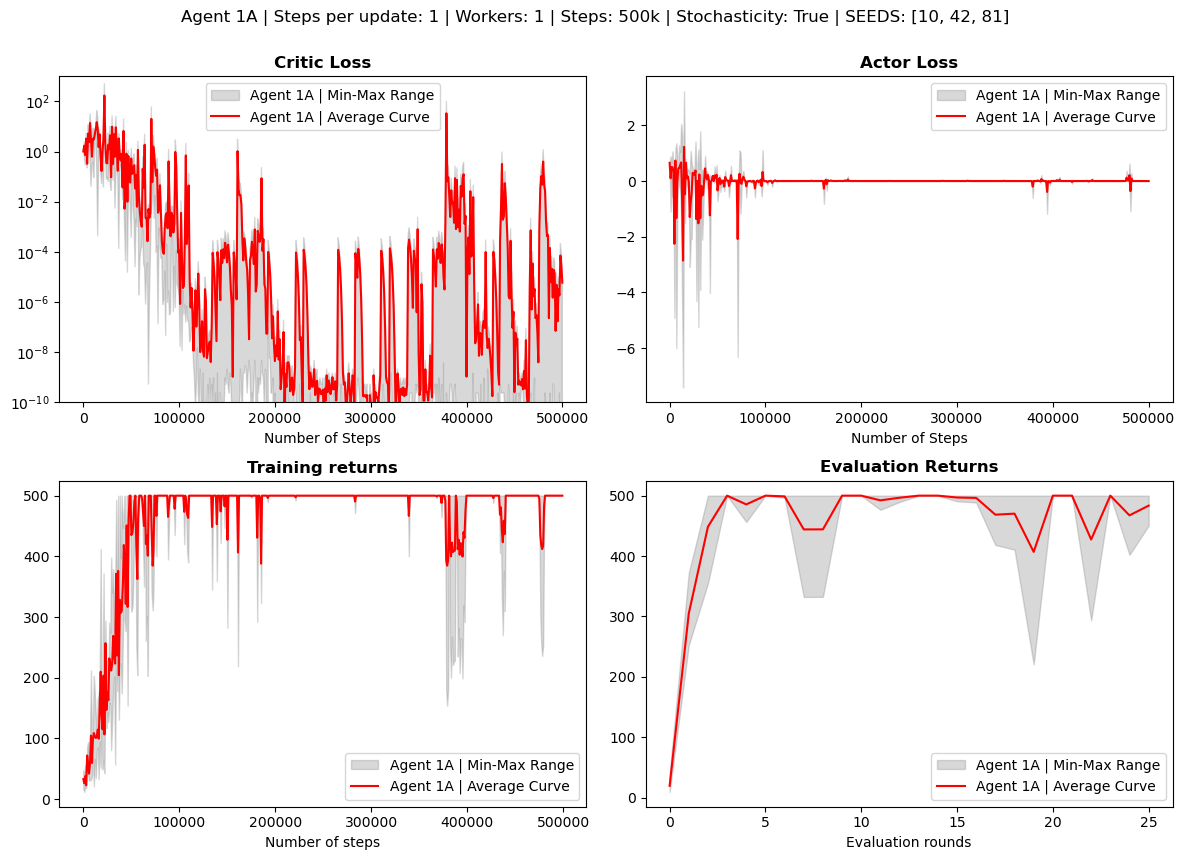

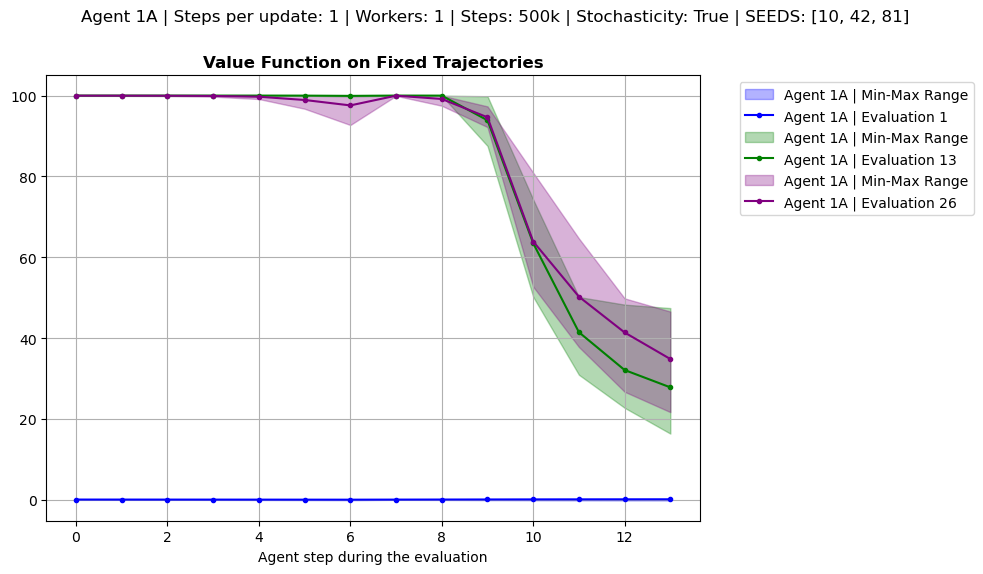

In [65]:
# Define the directory path
id_agent = "1A"
directory = f'figures/Agent_{id_agent}'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Plot the losses and returns
fig_in, axs_in = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
compare_bool = False
y_lim_losses = [1e-10, 1e3]
plot_losses_and_returns(fig_in, axs_in, compare_bool, critic_losses_1a, actor_losses_1a, train_returns_idx_1a, training_returns_1a, evaluation_returns_seeds_1a, agents_seeds, id_agent, n_steps_per_update_1a, n_envs_1a, color_agent = 'red', y_lim = y_lim_losses)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_1a} | Workers: {n_envs_1a} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Losses&Returns.png'), bbox_inches='tight')
plt.show()

# Plot the value function trajectories
marker_styles = [".", "1", '^', 'x', '+']
plt.figure(figsize=(10, 6))
plot_trajectories(plt, values_1a, agents_seeds, id_agent, marker_styles[0], n_traj = 3)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_1a} | Workers: {n_envs_1a} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Trajectories.png'), bbox_inches='tight')
plt.show()

### AGENT 1.B (K = 1 | n = 1) STOCHASTIC

#### HYPERPARAMETERS SETUP

In [7]:
id_agent = "1B" # ID of the Agent for the report [1:6]
n_envs_1b = 1
envs = []
for i in range(n_envs_1b):
    env = gym.make(environment)
    envs.append(env)

n_steps_per_update_1b = 1
n_updates = n_steps // (n_steps_per_update_1b*n_envs_1b)
evaluation_interval = 20000//(n_steps_per_update_1b*n_envs_1b) # evaluate the agent every 20k steps
n_evaluations = n_updates // evaluation_interval
stochasticity_bool = True
#agents_data_discrete = load_agents_data("agents_data_discrete.npz") # Load the data of the previous agents

#### TRAIN AGENT

In [8]:
# Logging training variables
t0 = time.time()
values_1b, critic_losses_1b, actor_losses_1b, entropies_1b, evaluation_returns_seeds_1b, training_returns_1b, training_returns_idx = trainAgent(n_steps, agents_seeds,n_seeds,envs,env_eval,n_updates,bool_discrete,obs_shape,action_space_dims,device,critic_lr, actor_lr, n_envs_1b, n_steps_per_update_1b, evaluation_interval, logging_interval, n_eval_runs,stochasticity_bool,stochastic_reward_probability,gamma)
training_time_1b = time.time() - t0
train_returns_idx_1b = aggregate_return_seeds(training_returns_idx) # Aggregate the returns of the training over the 3 seeds

agents_data_discrete.update(create_agent_data('agent_1b', values_1b, critic_losses_1b, actor_losses_1b, entropies_1b, evaluation_returns_seeds_1b, agents_seeds, n_steps, stochasticity_bool, n_envs_1b, n_steps_per_update_1b, train_returns_idx_1b, training_returns_1b, training_time_1b))
save_agents_data(agents_data_discrete, 'agents_data_discrete.npz') # Saving the data of the agents

Running seed 10 for agent 0


  0%|          | 109/500001 [00:00<07:40, 1086.09it/s]

EVALUATION


  4%|▍         | 19907/500001 [00:14<05:46, 1385.57it/s]

EVALUATION


  8%|▊         | 39962/500001 [00:30<06:04, 1262.13it/s]

EVALUATION


 12%|█▏        | 59932/500001 [00:46<05:16, 1392.53it/s]

EVALUATION


 16%|█▌        | 79992/500001 [01:01<05:00, 1398.46it/s]

EVALUATION


 20%|█▉        | 99954/500001 [01:16<04:43, 1413.52it/s]

EVALUATION


 24%|██▍       | 119906/500001 [01:31<04:36, 1375.41it/s]

EVALUATION


 28%|██▊       | 140082/500001 [01:46<05:58, 1004.27it/s]

EVALUATION


 32%|███▏      | 159941/500001 [02:01<04:03, 1398.90it/s]

EVALUATION


 36%|███▌      | 179907/500001 [02:16<03:49, 1396.02it/s]

EVALUATION


 40%|███▉      | 199929/500001 [02:31<03:40, 1362.15it/s]

EVALUATION


 44%|████▍     | 219964/500001 [02:46<03:31, 1325.77it/s]

EVALUATION


 48%|████▊     | 240018/500001 [03:02<04:39, 931.07it/s] 

EVALUATION


 52%|█████▏    | 259967/500001 [03:17<03:07, 1280.27it/s]

EVALUATION


 56%|█████▌    | 279934/500001 [03:32<02:36, 1403.42it/s]

EVALUATION


 60%|█████▉    | 299905/500001 [03:47<02:50, 1176.36it/s]

EVALUATION


 64%|██████▍   | 319913/500001 [04:03<02:24, 1249.31it/s]

EVALUATION


 68%|██████▊   | 339913/500001 [04:19<01:55, 1380.40it/s]

EVALUATION


 72%|███████▏  | 359930/500001 [04:35<01:45, 1333.43it/s]

EVALUATION


 76%|███████▌  | 380087/500001 [04:52<02:00, 999.17it/s] 

EVALUATION


 80%|████████  | 400043/500001 [05:08<01:43, 961.72it/s] 

EVALUATION


 84%|████████▍ | 419983/500001 [05:23<00:59, 1354.41it/s]

EVALUATION


 88%|████████▊ | 440043/500001 [05:39<01:07, 888.00it/s] 

EVALUATION


 92%|█████████▏| 459961/500001 [05:55<00:29, 1341.93it/s]

EVALUATION


 96%|█████████▌| 479979/500001 [06:11<00:14, 1410.04it/s]

EVALUATION


100%|█████████▉| 499878/500001 [06:28<00:00, 1208.57it/s]

EVALUATION


100%|██████████| 500001/500001 [06:28<00:00, 1286.09it/s]


Running seed 42 for agent 1


  0%|          | 63/500001 [00:00<13:21, 623.81it/s]

EVALUATION


  4%|▍         | 19889/500001 [00:16<05:38, 1416.68it/s]

EVALUATION


  8%|▊         | 39915/500001 [00:30<05:24, 1419.78it/s]

EVALUATION


 12%|█▏        | 59996/500001 [00:45<05:06, 1434.14it/s]

EVALUATION


 16%|█▌        | 79936/500001 [01:00<04:56, 1414.39it/s]

EVALUATION


 20%|██        | 100069/500001 [01:14<06:45, 985.44it/s]

EVALUATION


 24%|██▍       | 119939/500001 [01:29<04:28, 1413.90it/s]

EVALUATION


 28%|██▊       | 139984/500001 [01:44<04:13, 1419.58it/s]

EVALUATION


 32%|███▏      | 159982/500001 [01:58<03:58, 1427.95it/s]

EVALUATION


 36%|███▌      | 179939/500001 [02:13<03:45, 1418.95it/s]

EVALUATION


 40%|███▉      | 199874/500001 [02:28<03:31, 1416.97it/s]

EVALUATION


 44%|████▍     | 219979/500001 [02:42<03:17, 1420.31it/s]

EVALUATION


 48%|████▊     | 239884/500001 [02:57<03:03, 1416.19it/s]

EVALUATION


 52%|█████▏    | 259914/500001 [03:12<03:21, 1191.26it/s]

EVALUATION


 56%|█████▌    | 279869/500001 [03:26<02:36, 1409.19it/s]

EVALUATION


 60%|█████▉    | 299990/500001 [03:42<02:19, 1428.92it/s]

EVALUATION


 64%|██████▍   | 319989/500001 [03:56<02:05, 1439.48it/s]

EVALUATION


 68%|██████▊   | 340100/500001 [04:10<02:28, 1076.47it/s]

EVALUATION


 72%|███████▏  | 359888/500001 [04:24<01:37, 1432.50it/s]

EVALUATION


 76%|███████▌  | 379978/500001 [04:39<01:24, 1415.57it/s]

EVALUATION


 80%|███████▉  | 399937/500001 [04:53<01:09, 1440.64it/s]

EVALUATION


 84%|████████▍ | 419994/500001 [05:08<00:55, 1436.04it/s]

EVALUATION


 88%|████████▊ | 439956/500001 [05:22<00:41, 1438.73it/s]

EVALUATION


 92%|█████████▏| 459884/500001 [05:37<00:28, 1396.52it/s]

EVALUATION


 96%|█████████▌| 479929/500001 [05:51<00:16, 1220.56it/s]

EVALUATION


100%|█████████▉| 499940/500001 [06:06<00:00, 1434.47it/s]

EVALUATION


100%|██████████| 500001/500001 [06:06<00:00, 1364.37it/s]


Running seed 81 for agent 2


  0%|          | 122/500001 [00:00<06:51, 1215.83it/s]

EVALUATION


  4%|▍         | 19923/500001 [00:13<05:34, 1433.88it/s]

EVALUATION


  8%|▊         | 39884/500001 [00:28<05:20, 1437.83it/s]

EVALUATION


 12%|█▏        | 59992/500001 [00:43<05:22, 1362.65it/s]

EVALUATION


 16%|█▌        | 79879/500001 [00:58<05:06, 1368.74it/s]

EVALUATION


 20%|█▉        | 99863/500001 [01:14<05:07, 1301.85it/s]

EVALUATION


 24%|██▍       | 119986/500001 [01:29<04:32, 1392.77it/s]

EVALUATION


 28%|██▊       | 139977/500001 [01:44<04:23, 1368.00it/s]

EVALUATION


 32%|███▏      | 159999/500001 [01:59<04:11, 1353.68it/s]

EVALUATION


 36%|███▌      | 179989/500001 [02:14<03:55, 1361.08it/s]

EVALUATION


 40%|███▉      | 199922/500001 [02:29<03:42, 1348.42it/s]

EVALUATION


 44%|████▍     | 219947/500001 [02:45<03:27, 1349.66it/s]

EVALUATION


 48%|████▊     | 239981/500001 [03:00<03:12, 1347.41it/s]

EVALUATION


 52%|█████▏    | 259919/500001 [03:15<03:15, 1228.69it/s]

EVALUATION


 56%|█████▌    | 279872/500001 [03:31<02:44, 1341.47it/s]

EVALUATION


 60%|█████▉    | 299911/500001 [03:47<02:28, 1348.57it/s]

EVALUATION


 64%|██████▍   | 319917/500001 [04:02<02:14, 1337.56it/s]

EVALUATION


 68%|██████▊   | 339970/500001 [04:18<02:00, 1333.31it/s]

EVALUATION


 72%|███████▏  | 359909/500001 [04:33<01:45, 1331.68it/s]

EVALUATION


 76%|███████▌  | 379999/500001 [04:48<01:28, 1359.53it/s]

EVALUATION


 80%|███████▉  | 399878/500001 [05:04<01:16, 1315.74it/s]

EVALUATION


 84%|████████▍ | 419973/500001 [05:19<01:00, 1330.41it/s]

EVALUATION


 88%|████████▊ | 439875/500001 [05:35<00:44, 1345.12it/s]

EVALUATION


 92%|█████████▏| 459975/500001 [05:51<00:45, 876.94it/s] 

EVALUATION


 96%|█████████▌| 479974/500001 [06:07<00:14, 1344.74it/s]

EVALUATION


100%|█████████▉| 499891/500001 [06:22<00:00, 1352.69it/s]

EVALUATION


100%|██████████| 500001/500001 [06:23<00:00, 1304.74it/s]


#### PLOTTING

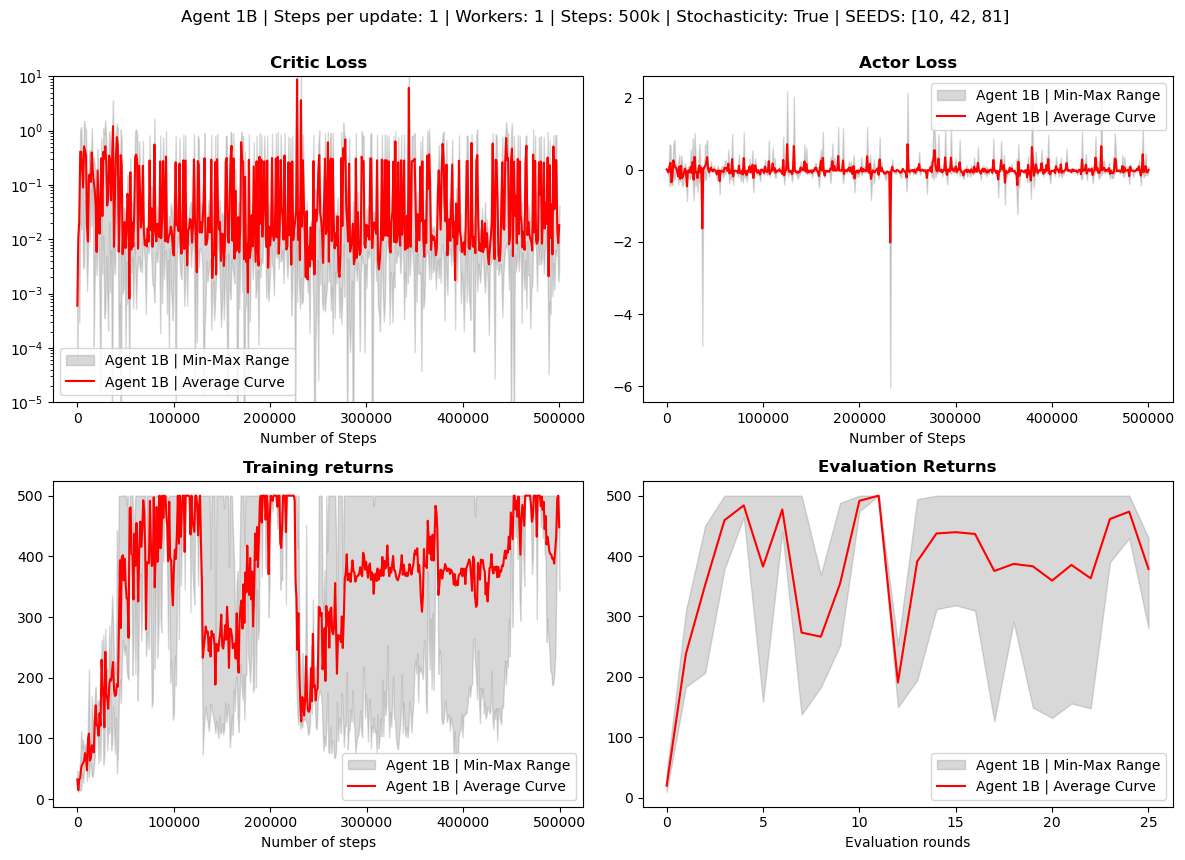

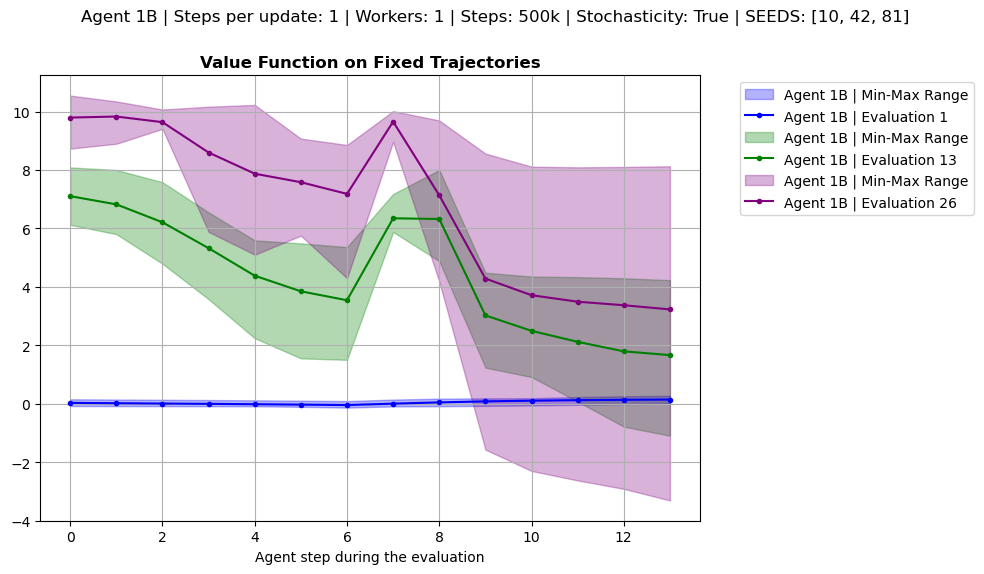

In [67]:
# Define the directory path
id_agent = "1B"
directory = f'figures/Agent_{id_agent}'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Plot the losses and returns
fig_in, axs_in = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
compare_bool = False
y_lim_losses = [1e-5, 1e1]
plot_losses_and_returns(fig_in, axs_in, compare_bool, critic_losses_1b, actor_losses_1b, train_returns_idx_1b, training_returns_1b, evaluation_returns_seeds_1b, agents_seeds, id_agent, n_steps_per_update_1b, n_envs_1b, color_agent = 'red', y_lim = y_lim_losses)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_1b} | Workers: {n_envs_1b} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Losses&Returns.png'), bbox_inches='tight')
plt.show()

# Plot the value function trajectories
marker_styles = [".", "1", '^', 'x', '+']
plt.figure(figsize=(10, 6))
plot_trajectories(plt, values_1b, agents_seeds, id_agent, marker_styles[0], n_traj = 3)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_1b} | Workers: {n_envs_1b} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Trajectories.png'), bbox_inches='tight')
plt.show()

### AGENT 2 (K = 6 | n = 1)

#### HYPERPARAMETERS SETUP

In [10]:
id_agent = "2" # ID of the Agent for the report [1:6]
n_envs_2 = 6
envs = []
for i in range(n_envs_2):
    env = gym.make(environment)
    envs.append(env)

n_steps_per_update_2 = 1
n_updates = n_steps // (n_steps_per_update_2*n_envs_2)
evaluation_interval = 20000//(n_steps_per_update_2*n_envs_2) # evaluate the agent every 20k steps
n_evaluations = n_updates // evaluation_interval
logging_interval = math.floor(1000/(n_steps_per_update_2 * n_envs_2))
stochasticity_bool = True
#agents_data_discrete = load_agents_data("agents_data_discrete.npz") # Load the data of the previous agents

#### TRAIN AGENT

In [11]:
# Logging training variables
t0 = time.time()
values_2, critic_losses_2, actor_losses_2, entropies_2, evaluation_returns_seeds_2, training_returns_2, training_returns_idx = trainAgent(n_steps, agents_seeds,n_seeds,envs,env_eval,n_updates,bool_discrete,obs_shape,action_space_dims,device,critic_lr, actor_lr, n_envs_2, n_steps_per_update_2, evaluation_interval, logging_interval, n_eval_runs,stochasticity_bool,stochastic_reward_probability,gamma)
training_time_2 = time.time() - t0
train_returns_idx_2 = aggregate_return_seeds(training_returns_idx) # Aggregate the returns of the training over the 3 seeds

agents_data_discrete.update(create_agent_data('agent_2', values_2, critic_losses_2, actor_losses_2, entropies_2, evaluation_returns_seeds_2, agents_seeds, n_steps, stochasticity_bool, n_envs_2, n_steps_per_update_2, train_returns_idx_2, training_returns_2, training_time_2))
save_agents_data(agents_data_discrete, 'agents_data_discrete.npz') # Saving the data of the agents



Running seed 10 for agent 0


  0%|          | 28/83334 [00:00<05:04, 273.51it/s]

EVALUATION


  4%|▍         | 3398/83334 [00:08<03:23, 392.69it/s]

EVALUATION


  8%|▊         | 6696/83334 [00:17<03:27, 368.51it/s]

EVALUATION


 12%|█▏        | 10043/83334 [00:25<03:26, 354.32it/s]

EVALUATION


 16%|█▌        | 13369/83334 [00:35<03:34, 325.68it/s]

EVALUATION


 20%|██        | 16693/83334 [00:43<03:17, 336.67it/s]

EVALUATION


 24%|██▍       | 20027/83334 [00:52<03:11, 330.46it/s]

EVALUATION


 28%|██▊       | 23360/83334 [01:00<03:04, 324.51it/s]

EVALUATION


 32%|███▏      | 26680/83334 [01:09<02:55, 322.89it/s]

EVALUATION


 36%|███▌      | 29994/83334 [01:17<02:17, 389.29it/s]

EVALUATION


 40%|████      | 33347/83334 [01:26<02:40, 311.71it/s]

EVALUATION


 44%|████▍     | 36692/83334 [01:35<02:26, 317.39it/s]

EVALUATION


 48%|████▊     | 40008/83334 [01:43<02:16, 316.69it/s]

EVALUATION


 52%|█████▏    | 43357/83334 [01:52<02:04, 320.33it/s]

EVALUATION


 56%|█████▌    | 46629/83334 [02:00<01:31, 401.05it/s]

EVALUATION


 60%|█████▉    | 49990/83334 [02:09<01:23, 398.85it/s]

EVALUATION


 64%|██████▍   | 53338/83334 [02:18<01:50, 271.45it/s]

EVALUATION


 68%|██████▊   | 56634/83334 [02:26<01:06, 402.94it/s]

EVALUATION


 72%|███████▏  | 59955/83334 [02:35<01:02, 373.07it/s]

EVALUATION


 76%|███████▌  | 63300/83334 [02:43<00:49, 401.97it/s]

EVALUATION


 80%|███████▉  | 66644/83334 [02:52<00:42, 396.22it/s]

EVALUATION


 84%|████████▍ | 69983/83334 [03:01<00:33, 403.19it/s]

EVALUATION


 88%|████████▊ | 73313/83334 [03:10<00:29, 338.88it/s]

EVALUATION


 92%|█████████▏| 76621/83334 [03:19<00:16, 401.13it/s]

EVALUATION


 96%|█████████▌| 79964/83334 [03:27<00:09, 360.61it/s]

EVALUATION


100%|█████████▉| 83307/83334 [03:36<00:00, 385.88it/s]

EVALUATION


100%|██████████| 83334/83334 [03:37<00:00, 383.81it/s]


Running seed 42 for agent 1


  0%|          | 34/83334 [00:00<04:06, 338.11it/s]

EVALUATION


  4%|▍         | 3378/83334 [00:08<03:27, 385.78it/s]

EVALUATION


  8%|▊         | 6685/83334 [00:16<03:46, 339.14it/s]

EVALUATION


 12%|█▏        | 10012/83334 [00:25<04:13, 289.69it/s]

EVALUATION


 16%|█▌        | 13313/83334 [00:33<02:57, 394.66it/s]

EVALUATION


 20%|█▉        | 16660/83334 [00:42<02:47, 398.91it/s]

EVALUATION


 24%|██▍       | 20008/83334 [00:50<03:31, 298.98it/s]

EVALUATION


 28%|██▊       | 23346/83334 [00:59<03:32, 281.94it/s]

EVALUATION


 32%|███▏      | 26656/83334 [01:07<02:22, 398.82it/s]

EVALUATION


 36%|███▌      | 29995/83334 [01:16<02:11, 405.15it/s]

EVALUATION


 40%|███▉      | 33320/83334 [01:25<02:14, 371.52it/s]

EVALUATION


 44%|████▍     | 36635/83334 [01:34<01:57, 398.86it/s]

EVALUATION


 48%|████▊     | 39986/83334 [01:42<01:44, 415.38it/s]

EVALUATION


 52%|█████▏    | 43325/83334 [01:51<01:43, 385.51it/s]

EVALUATION


 56%|█████▌    | 46660/83334 [02:00<01:28, 415.01it/s]

EVALUATION


 60%|█████▉    | 49961/83334 [02:08<01:20, 417.02it/s]

EVALUATION


 64%|██████▍   | 53300/83334 [02:16<01:12, 417.07it/s]

EVALUATION


 68%|██████▊   | 56630/83334 [02:25<01:03, 418.43it/s]

EVALUATION


 72%|███████▏  | 59969/83334 [02:33<00:56, 416.61it/s]

EVALUATION


 76%|███████▌  | 63296/83334 [02:41<00:47, 421.49it/s]

EVALUATION


 80%|███████▉  | 66642/83334 [02:50<00:40, 417.29it/s]

EVALUATION


 84%|████████▍ | 69986/83334 [02:58<00:31, 420.51it/s]

EVALUATION


 88%|████████▊ | 73306/83334 [03:07<00:23, 418.73it/s]

EVALUATION


 92%|█████████▏| 76619/83334 [03:15<00:16, 418.53it/s]

EVALUATION


 96%|█████████▌| 79966/83334 [03:24<00:08, 420.93it/s]

EVALUATION


100%|█████████▉| 83296/83334 [03:32<00:00, 418.18it/s]

EVALUATION


100%|██████████| 83334/83334 [03:32<00:00, 391.28it/s]


Running seed 81 for agent 2


  0%|          | 36/83334 [00:00<03:51, 359.49it/s]

EVALUATION


  4%|▍         | 3404/83334 [00:08<03:16, 406.80it/s]

EVALUATION


  8%|▊         | 6730/83334 [00:16<03:15, 392.83it/s]

EVALUATION


 12%|█▏        | 10045/83334 [00:24<03:19, 366.47it/s]

EVALUATION


 16%|█▌        | 13350/83334 [00:32<03:46, 308.30it/s]

EVALUATION


 20%|██        | 16699/83334 [00:40<03:28, 319.98it/s]

EVALUATION


 24%|██▍       | 20041/83334 [00:48<02:51, 369.50it/s]

EVALUATION


 28%|██▊       | 23362/83334 [00:56<03:04, 325.61it/s]

EVALUATION


 32%|███▏      | 26640/83334 [01:04<02:14, 421.40it/s]

EVALUATION


 36%|███▌      | 29991/83334 [01:12<02:06, 420.44it/s]

EVALUATION


 40%|███▉      | 33330/83334 [01:20<01:59, 419.45it/s]

EVALUATION


 44%|████▍     | 36638/83334 [01:29<01:52, 416.48it/s]

EVALUATION


 48%|████▊     | 39974/83334 [01:37<01:43, 419.84it/s]

EVALUATION


 52%|█████▏    | 43288/83334 [01:45<01:35, 418.50it/s]

EVALUATION


 56%|█████▌    | 46638/83334 [01:54<01:28, 412.76it/s]

EVALUATION


 60%|█████▉    | 49968/83334 [02:02<01:19, 419.62it/s]

EVALUATION


 64%|██████▍   | 53294/83334 [02:11<01:12, 416.65it/s]

EVALUATION


 68%|██████▊   | 56644/83334 [02:19<01:03, 420.53it/s]

EVALUATION


 72%|███████▏  | 59981/83334 [02:27<00:55, 418.30it/s]

EVALUATION


 76%|███████▌  | 63307/83334 [02:36<00:47, 420.72it/s]

EVALUATION


 80%|███████▉  | 66632/83334 [02:44<00:40, 414.73it/s]

EVALUATION


 84%|████████▍ | 69961/83334 [02:53<00:33, 397.56it/s]

EVALUATION


 88%|████████▊ | 73309/83334 [03:01<00:23, 421.66it/s]

EVALUATION


 92%|█████████▏| 76658/83334 [03:09<00:15, 418.70it/s]

EVALUATION


 96%|█████████▌| 79979/83334 [03:18<00:07, 421.70it/s]

EVALUATION


100%|█████████▉| 83309/83334 [03:26<00:00, 420.50it/s]

EVALUATION


100%|██████████| 83334/83334 [03:27<00:00, 402.22it/s]


#### PLOTTING

In [12]:
for i in range(3):
    print(training_returns_idx[-5:, i])



[79023 80036 81018 82039 83086]
[79016 80071 81024 82031 83001]
[79028 80000 81031 82024 83030]


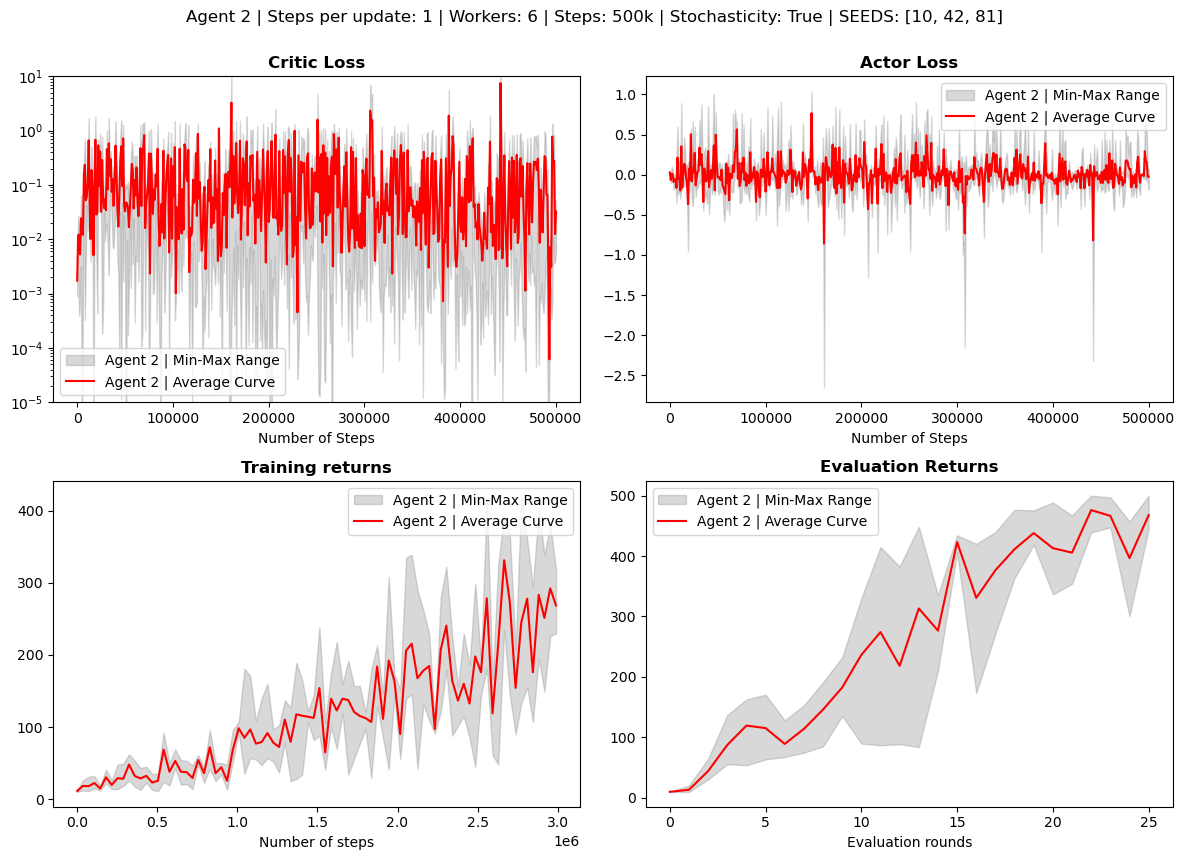

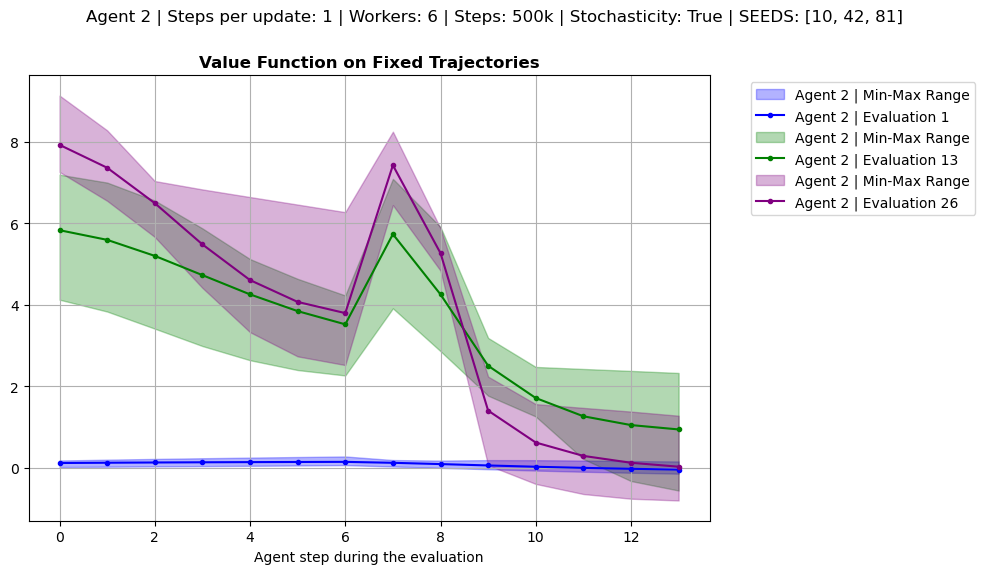

In [68]:
# Define the directory path
id_agent = "2"
directory = f'figures/Agent_{id_agent}'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Plot the losses and returns
fig_in, axs_in = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
compare_bool = False
y_lim_losses = [1e-5, 1e1]
plot_losses_and_returns(fig_in, axs_in, compare_bool, critic_losses_2, actor_losses_2, train_returns_idx_2, training_returns_2, evaluation_returns_seeds_2, agents_seeds, id_agent, n_steps_per_update_2, n_envs_2, color_agent = 'red', y_lim = y_lim_losses)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_2} | Workers: {n_envs_2} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Losses&Returns.png'), bbox_inches='tight')
plt.show()

# Plot the value function trajectories
marker_styles = [".", "1", '^', 'x', '+']
plt.figure(figsize=(10, 6))
plot_trajectories(plt, values_2, agents_seeds, id_agent, marker_styles[0], n_traj = 3)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_2} | Workers: {n_envs_2} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Trajectories.png'), bbox_inches='tight')
plt.show()

### AGENT 3 (K = 1 | n = 6)

#### HYPERPARAMETERS SETUP

In [14]:
id_agent = "3" # ID of the Agent for the report [1:6]
n_envs_3 = 1
envs = []
for i in range(n_envs_3):
    env = gym.make(environment)
    envs.append(env)

n_steps_per_update_3 = 6
n_updates = n_steps // (n_steps_per_update_3*n_envs_3)
evaluation_interval = 20000//(n_steps_per_update_3*n_envs_3) # evaluate the agent every 20k steps
n_evaluations = n_updates // evaluation_interval
logging_interval = math.floor(1000/(n_steps_per_update_3 * n_envs_3))
stochasticity_bool = True
#agents_data_discrete = load_agents_data("agents_data_discrete.npz") # Load the data of the previous agents

#### TRAIN AGENT

In [15]:
# Logging training variables
t0 = time.time()
values_3, critic_losses_3, actor_losses_3, entropies_3, evaluation_returns_seeds_3, training_returns_3, training_returns_idx = trainAgent(n_steps, agents_seeds,n_seeds,envs,env_eval,n_updates,bool_discrete,obs_shape,action_space_dims,device,critic_lr, actor_lr, n_envs_3, n_steps_per_update_3, evaluation_interval, logging_interval, n_eval_runs,stochasticity_bool,stochastic_reward_probability,gamma)
training_time_3 = time.time() - t0
train_returns_idx_3 = aggregate_return_seeds(training_returns_idx) # Aggregate the returns of the training over the 3 seeds

agents_data_discrete.update(create_agent_data('agent_3', values_3, critic_losses_3, actor_losses_3, entropies_3, evaluation_returns_seeds_3, agents_seeds, n_steps, stochasticity_bool, n_envs_3, n_steps_per_update_3, train_returns_idx_3, training_returns_3, training_time_3))
save_agents_data(agents_data_discrete, 'agents_data_discrete.npz') # Saving the data of the agents

Running seed 10 for agent 0


  0%|          | 36/83334 [00:00<03:52, 358.61it/s]

EVALUATION


  4%|▍         | 3352/83334 [00:08<05:46, 230.71it/s]

EVALUATION


  8%|▊         | 6663/83334 [00:17<03:23, 376.61it/s]

EVALUATION


 12%|█▏        | 9990/83334 [00:26<03:16, 373.30it/s]

EVALUATION


 16%|█▌        | 13319/83334 [00:34<02:50, 410.15it/s]

EVALUATION


 20%|█▉        | 16651/83334 [00:43<02:47, 399.30it/s]

EVALUATION


 24%|██▍       | 19988/83334 [00:52<02:21, 447.88it/s]

EVALUATION


 28%|██▊       | 23299/83334 [01:00<02:17, 437.49it/s]

EVALUATION


 32%|███▏      | 26659/83334 [01:09<02:06, 447.13it/s]

EVALUATION


 36%|███▌      | 29982/83334 [01:17<01:59, 445.06it/s]

EVALUATION


 40%|███▉      | 33325/83334 [01:25<01:51, 448.65it/s]

EVALUATION


 44%|████▍     | 36650/83334 [01:33<01:44, 447.67it/s]

EVALUATION


 48%|████▊     | 39987/83334 [01:41<01:37, 445.98it/s]

EVALUATION


 52%|█████▏    | 43321/83334 [01:49<01:29, 449.43it/s]

EVALUATION


 56%|█████▌    | 46636/83334 [01:57<01:26, 424.43it/s]

EVALUATION


 60%|█████▉    | 49979/83334 [02:05<01:15, 441.77it/s]

EVALUATION


 64%|██████▍   | 53298/83334 [02:13<01:08, 438.15it/s]

EVALUATION


 68%|██████▊   | 56636/83334 [02:21<01:00, 439.37it/s]

EVALUATION


 72%|███████▏  | 59987/83334 [02:29<00:52, 441.57it/s]

EVALUATION


 76%|███████▌  | 63304/83334 [02:37<00:45, 440.84it/s]

EVALUATION


 80%|███████▉  | 66637/83334 [02:45<00:40, 415.33it/s]

EVALUATION


 84%|████████▍ | 69978/83334 [02:53<00:30, 442.02it/s]

EVALUATION


 88%|████████▊ | 73307/83334 [03:01<00:22, 440.95it/s]

EVALUATION


 92%|█████████▏| 76620/83334 [03:09<00:15, 440.84it/s]

EVALUATION


 96%|█████████▌| 79985/83334 [03:17<00:07, 445.13it/s]

EVALUATION


100%|█████████▉| 83316/83334 [03:25<00:00, 443.31it/s]

EVALUATION


100%|██████████| 83334/83334 [03:26<00:00, 403.67it/s]


Running seed 42 for agent 1


  0%|          | 37/83334 [00:00<03:45, 368.60it/s]

EVALUATION


  4%|▍         | 3317/83334 [00:07<02:55, 454.83it/s]

EVALUATION


  8%|▊         | 6645/83334 [00:15<02:52, 444.82it/s]

EVALUATION


 12%|█▏        | 9956/83334 [00:22<02:47, 437.37it/s]

EVALUATION


 16%|█▌        | 13306/83334 [00:30<02:34, 454.70it/s]

EVALUATION


 20%|█▉        | 16655/83334 [00:38<02:29, 445.52it/s]

EVALUATION


 24%|██▍       | 19992/83334 [00:46<02:22, 445.41it/s]

EVALUATION


 28%|██▊       | 23305/83334 [00:54<02:13, 449.93it/s]

EVALUATION


 32%|███▏      | 26626/83334 [01:02<02:06, 446.61it/s]

EVALUATION


 36%|███▌      | 29997/83334 [01:10<02:01, 439.04it/s]

EVALUATION


 40%|███▉      | 33298/83334 [01:18<01:51, 449.03it/s]

EVALUATION


 44%|████▍     | 36634/83334 [01:26<01:48, 428.83it/s]

EVALUATION


 48%|████▊     | 39983/83334 [01:34<01:35, 453.00it/s]

EVALUATION


 52%|█████▏    | 43296/83334 [01:41<01:29, 449.26it/s]

EVALUATION


 56%|█████▌    | 46634/83334 [01:49<01:21, 449.99it/s]

EVALUATION


 60%|█████▉    | 49982/83334 [01:57<01:13, 452.99it/s]

EVALUATION


 64%|██████▍   | 53290/83334 [02:05<01:06, 449.36it/s]

EVALUATION


 68%|██████▊   | 56652/83334 [02:13<00:59, 450.91it/s]

EVALUATION


 72%|███████▏  | 59955/83334 [02:21<00:51, 451.32it/s]

EVALUATION


 76%|███████▌  | 63289/83334 [02:29<00:44, 448.17it/s]

EVALUATION


 80%|███████▉  | 66659/83334 [02:37<00:37, 449.60it/s]

EVALUATION


 84%|████████▍ | 69982/83334 [02:46<00:34, 382.75it/s]

EVALUATION


 88%|████████▊ | 73312/83334 [02:55<00:25, 397.77it/s]

EVALUATION


 92%|█████████▏| 76642/83334 [03:04<00:16, 398.27it/s]

EVALUATION


 96%|█████████▌| 79951/83334 [03:13<00:08, 395.96it/s]

EVALUATION


100%|█████████▉| 83315/83334 [03:22<00:00, 436.76it/s]

EVALUATION


100%|██████████| 83334/83334 [03:23<00:00, 410.44it/s]


Running seed 81 for agent 2


  0%|          | 36/83334 [00:00<03:51, 359.10it/s]

EVALUATION


  4%|▍         | 3354/83334 [00:08<04:31, 295.03it/s]

EVALUATION


  8%|▊         | 6650/83334 [00:15<03:04, 415.51it/s]

EVALUATION


 12%|█▏        | 9959/83334 [00:23<02:51, 428.52it/s]

EVALUATION


 16%|█▌        | 13289/83334 [00:31<02:57, 394.49it/s]

EVALUATION


 20%|█▉        | 16655/83334 [00:39<02:30, 444.46it/s]

EVALUATION


 24%|██▍       | 19975/83334 [00:47<02:21, 448.80it/s]

EVALUATION


 28%|██▊       | 23312/83334 [00:55<02:13, 450.34it/s]

EVALUATION


 32%|███▏      | 26625/83334 [01:03<02:14, 420.80it/s]

EVALUATION


 36%|███▌      | 29953/83334 [01:11<01:57, 452.49it/s]

EVALUATION


 40%|███▉      | 33319/83334 [01:19<01:51, 447.25it/s]

EVALUATION


 44%|████▍     | 36652/83334 [01:26<01:45, 443.58it/s]

EVALUATION


 48%|████▊     | 39977/83334 [01:34<01:35, 453.40it/s]

EVALUATION


 52%|█████▏    | 43299/83334 [01:42<01:28, 449.92it/s]

EVALUATION


 56%|█████▌    | 46624/83334 [01:50<01:22, 443.68it/s]

EVALUATION


 60%|█████▉    | 49968/83334 [01:58<01:14, 445.48it/s]

EVALUATION


 64%|██████▍   | 53311/83334 [02:06<01:07, 443.70it/s]

EVALUATION


 68%|██████▊   | 56631/83334 [02:14<00:58, 453.58it/s]

EVALUATION


 72%|███████▏  | 59976/83334 [02:22<00:51, 453.35it/s]

EVALUATION


 76%|███████▌  | 63283/83334 [02:30<00:44, 451.65it/s]

EVALUATION


 80%|███████▉  | 66630/83334 [02:38<00:36, 452.47it/s]

EVALUATION


 84%|████████▍ | 69978/83334 [02:46<00:30, 443.80it/s]

EVALUATION


 88%|████████▊ | 73314/83334 [02:54<00:22, 450.44it/s]

EVALUATION


 92%|█████████▏| 76654/83334 [03:02<00:15, 441.33it/s]

EVALUATION


 96%|█████████▌| 79951/83334 [03:09<00:07, 453.88it/s]

EVALUATION


100%|█████████▉| 83299/83334 [03:17<00:00, 453.93it/s]

EVALUATION


100%|██████████| 83334/83334 [03:18<00:00, 420.25it/s]


#### PLOTTING

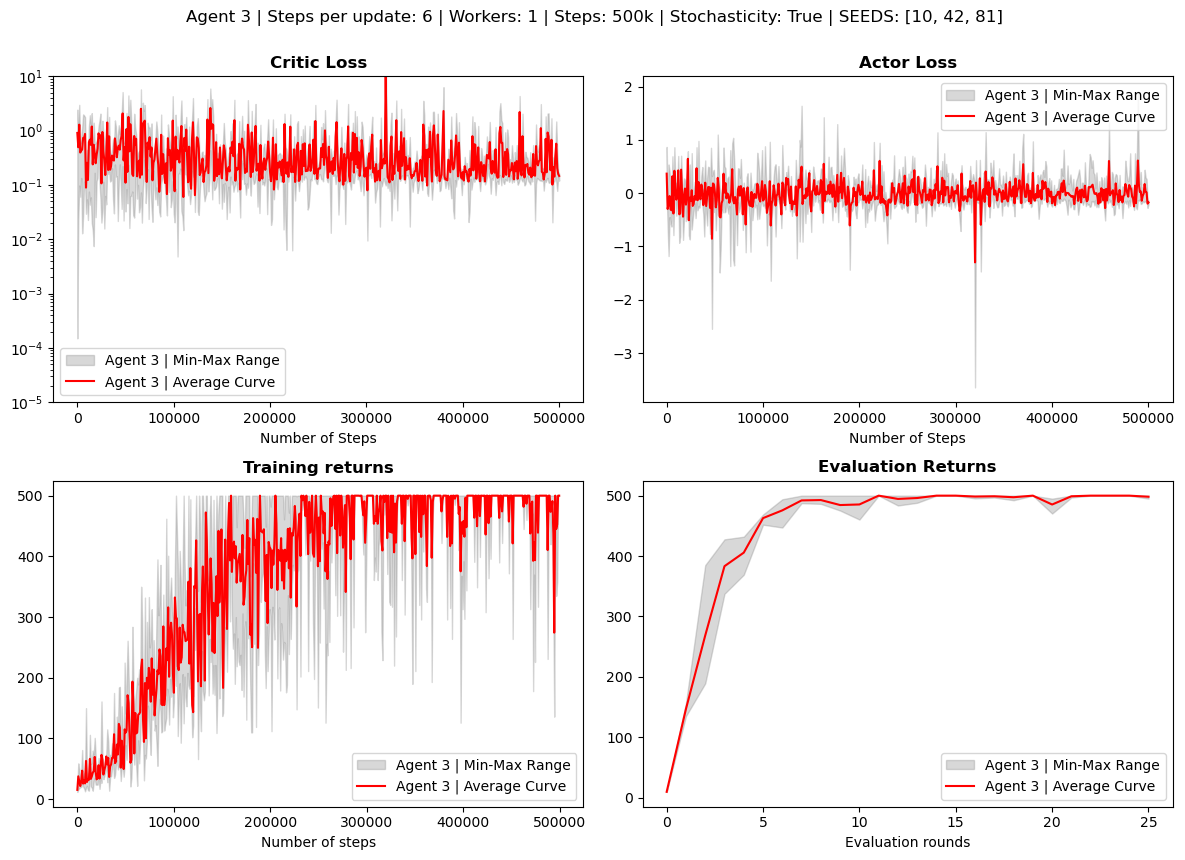

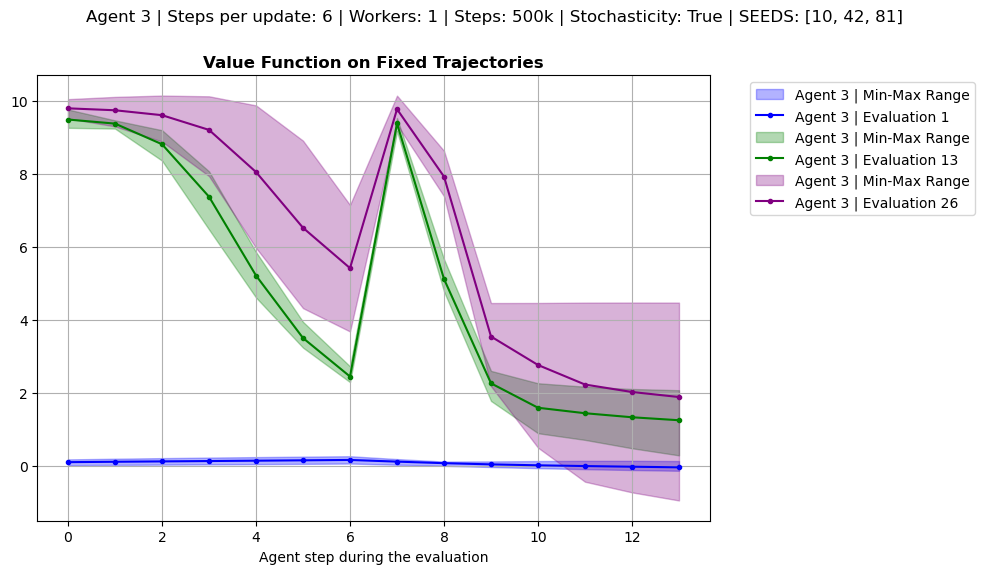

In [69]:
# Define the directory path
id_agent = "3"
directory = f'figures/Agent_{id_agent}'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Plot the losses and returns
fig_in, axs_in = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
compare_bool = False
y_lim_losses = [1e-5, 1e1]
plot_losses_and_returns(fig_in, axs_in, compare_bool, critic_losses_3, actor_losses_3, train_returns_idx_3, training_returns_3, evaluation_returns_seeds_3, agents_seeds, id_agent, n_steps_per_update_3, n_envs_3, color_agent = 'red', y_lim = y_lim_losses)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_3} | Workers: {n_envs_3} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Losses&Returns.png'), bbox_inches='tight')
plt.show()

# Plot the value function trajectories
marker_styles = [".", "1", '^', 'x', '+']
plt.figure(figsize=(10, 6))
plot_trajectories(plt, values_3, agents_seeds, id_agent, marker_styles[0], n_traj = 3)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_3} | Workers: {n_envs_3} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Trajectories.png'), bbox_inches='tight')
plt.show()

### AGENT 4 (K = 6 | n = 6)

#### HYPERPARAMETERS SETUP

In [17]:
id_agent = "4" # ID of the Agent for the report [1:6]
n_envs_4 = 6
envs = []
for i in range(n_envs_4):
    env = gym.make(environment)
    envs.append(env)

n_steps_per_update_4 = 6
n_updates = n_steps // (n_steps_per_update_4*n_envs_4)
evaluation_interval = 20000//(n_steps_per_update_4*n_envs_4) # evaluate the agent every 20k steps
n_evaluations = n_updates // evaluation_interval
logging_interval = math.floor(1000/(n_steps_per_update_4 * n_envs_4))
stochasticity_bool = True
#agents_data_discrete = load_agents_data("agents_data_discrete.npz") # Load the data of the previous agents

#### TRAIN AGENT

In [18]:
# Logging training variables
t0 = time.time()
values_4, critic_losses_4, actor_losses_4, entropies_4, evaluation_returns_seeds_4, training_returns_4, training_returns_idx = trainAgent(n_steps, agents_seeds,n_seeds,envs,env_eval,n_updates,bool_discrete,obs_shape,action_space_dims,device,critic_lr, actor_lr, n_envs_4, n_steps_per_update_4, evaluation_interval, logging_interval, n_eval_runs,stochasticity_bool,stochastic_reward_probability,gamma)
training_time_4 = time.time() - t0
train_returns_idx_4 = aggregate_return_seeds(training_returns_idx) # Aggregate the returns of the training over the 3 seeds

agents_data_discrete.update(create_agent_data('agent_4', values_4, critic_losses_4, actor_losses_4, entropies_4, evaluation_returns_seeds_4, agents_seeds, n_steps, stochasticity_bool, n_envs_4, n_steps_per_update_4, train_returns_idx_4, training_returns_4, training_time_4))
save_agents_data(agents_data_discrete, 'agents_data_discrete.npz') # Saving the data of the agents

Running seed 10 for agent 0


  0%|          | 8/13889 [00:00<03:03, 75.80it/s]

EVALUATION


  4%|▍         | 564/13889 [00:06<02:28, 89.91it/s]

EVALUATION


  8%|▊         | 1124/13889 [00:12<02:21, 90.16it/s]

EVALUATION


 12%|█▏        | 1674/13889 [00:18<02:19, 87.31it/s]

EVALUATION


 16%|█▌        | 2233/13889 [00:24<02:12, 87.69it/s]

EVALUATION


 20%|██        | 2783/13889 [00:30<02:10, 85.34it/s]

EVALUATION


 24%|██▍       | 3343/13889 [00:36<02:06, 83.24it/s]

EVALUATION


 28%|██▊       | 3881/13889 [00:42<01:52, 88.85it/s]

EVALUATION


 32%|███▏      | 4441/13889 [00:49<02:43, 57.87it/s]

EVALUATION


 36%|███▌      | 4987/13889 [00:55<01:35, 93.19it/s]

EVALUATION


 40%|███▉      | 5547/13889 [01:02<01:29, 92.97it/s]

EVALUATION


 44%|████▍     | 6110/13889 [01:08<01:44, 74.39it/s]

EVALUATION


 48%|████▊     | 6668/13889 [01:14<01:45, 68.57it/s]

EVALUATION


 52%|█████▏    | 7216/13889 [01:21<01:38, 67.92it/s]

EVALUATION


 56%|█████▌    | 7778/13889 [01:28<01:25, 71.17it/s]

EVALUATION


 60%|█████▉    | 8316/13889 [01:34<01:03, 88.20it/s]

EVALUATION


 64%|██████▍   | 8880/13889 [01:41<00:58, 85.38it/s]

EVALUATION


 68%|██████▊   | 9434/13889 [01:48<00:56, 78.49it/s]

EVALUATION


 72%|███████▏  | 9986/13889 [01:54<00:46, 84.34it/s]

EVALUATION


 76%|███████▌  | 10548/13889 [02:01<00:52, 63.70it/s]

EVALUATION


 80%|███████▉  | 11094/13889 [02:07<00:31, 89.87it/s]

EVALUATION


 84%|████████▍ | 11648/13889 [02:14<00:24, 90.07it/s]

EVALUATION


 88%|████████▊ | 12202/13889 [02:20<00:18, 89.52it/s]

EVALUATION


 92%|█████████▏| 12762/13889 [02:27<00:12, 91.05it/s]

EVALUATION


 96%|█████████▌| 13318/13889 [02:33<00:06, 90.88it/s]

EVALUATION


100%|█████████▉| 13873/13889 [02:39<00:00, 90.03it/s]

EVALUATION


100%|██████████| 13889/13889 [02:40<00:00, 86.45it/s]


Running seed 42 for agent 1


  0%|          | 8/13889 [00:00<03:01, 76.29it/s]

EVALUATION


  4%|▍         | 567/13889 [00:06<02:30, 88.31it/s]

EVALUATION


  8%|▊         | 1124/13889 [00:12<02:25, 87.51it/s]

EVALUATION


 12%|█▏        | 1668/13889 [00:18<02:43, 74.60it/s]

EVALUATION


 16%|█▌        | 2222/13889 [00:24<02:50, 68.55it/s]

EVALUATION


 20%|█▉        | 2776/13889 [00:31<02:33, 72.19it/s]

EVALUATION


 24%|██▍       | 3332/13889 [00:37<02:43, 64.67it/s]

EVALUATION


 28%|██▊       | 3886/13889 [00:43<02:37, 63.63it/s]

EVALUATION


 32%|███▏      | 4442/13889 [00:50<02:24, 65.56it/s]

EVALUATION


 36%|███▌      | 4997/13889 [00:56<02:09, 68.52it/s]

EVALUATION


 40%|███▉      | 5554/13889 [01:02<01:56, 71.28it/s]

EVALUATION


 44%|████▍     | 6106/13889 [01:08<01:57, 65.97it/s]

EVALUATION


 48%|████▊     | 6663/13889 [01:15<01:48, 66.79it/s]

EVALUATION


 52%|█████▏    | 7214/13889 [01:21<01:14, 90.20it/s]

EVALUATION


 56%|█████▌    | 7769/13889 [01:27<01:07, 90.58it/s]

EVALUATION


 60%|█████▉    | 8329/13889 [01:34<01:17, 71.77it/s]

EVALUATION


 64%|██████▍   | 8872/13889 [01:40<00:55, 90.42it/s]

EVALUATION


 68%|██████▊   | 9428/13889 [01:46<00:49, 90.77it/s]

EVALUATION


 72%|███████▏  | 9993/13889 [01:53<01:02, 62.78it/s]

EVALUATION


 76%|███████▌  | 10541/13889 [01:59<00:36, 90.59it/s]

EVALUATION


 80%|███████▉  | 11102/13889 [02:05<00:43, 63.68it/s]

EVALUATION


 84%|████████▍ | 11656/13889 [02:12<00:36, 60.44it/s]

EVALUATION


 88%|████████▊ | 12211/13889 [02:18<00:27, 61.08it/s]

EVALUATION


 92%|█████████▏| 12763/13889 [02:24<00:12, 90.03it/s]

EVALUATION


 96%|█████████▌| 13316/13889 [02:31<00:06, 90.51it/s]

EVALUATION


100%|█████████▉| 13867/13889 [02:37<00:00, 90.84it/s]

EVALUATION


100%|██████████| 13889/13889 [02:37<00:00, 87.94it/s]


Running seed 81 for agent 2


  0%|          | 8/13889 [00:00<03:01, 76.61it/s]

EVALUATION


  4%|▍         | 567/13889 [00:06<02:32, 87.40it/s]

EVALUATION


  8%|▊         | 1121/13889 [00:12<02:35, 82.09it/s]

EVALUATION


 12%|█▏        | 1678/13889 [00:18<02:18, 88.21it/s]

EVALUATION


 16%|█▌        | 2226/13889 [00:25<03:02, 63.89it/s]

EVALUATION


 20%|██        | 2779/13889 [00:31<02:45, 67.24it/s]

EVALUATION


 24%|██▍       | 3326/13889 [00:37<01:59, 88.70it/s]

EVALUATION


 28%|██▊       | 3888/13889 [00:44<02:15, 73.96it/s]

EVALUATION


 32%|███▏      | 4452/13889 [00:50<01:59, 79.15it/s]

EVALUATION


 36%|███▌      | 5000/13889 [00:57<01:58, 74.73it/s]

EVALUATION


 40%|████      | 5560/13889 [01:03<01:48, 76.75it/s]

EVALUATION


 44%|████▍     | 6110/13889 [01:09<02:02, 63.33it/s]

EVALUATION


 48%|████▊     | 6669/13889 [01:16<01:43, 70.01it/s]

EVALUATION


 52%|█████▏    | 7218/13889 [01:22<01:35, 69.82it/s]

EVALUATION


 56%|█████▌    | 7776/13889 [01:28<01:33, 65.47it/s]

EVALUATION


 60%|█████▉    | 8332/13889 [01:35<01:16, 72.70it/s]

EVALUATION


 64%|██████▍   | 8887/13889 [01:41<01:10, 70.94it/s]

EVALUATION


 68%|██████▊   | 9436/13889 [01:47<01:06, 67.31it/s]

EVALUATION


 72%|███████▏  | 9992/13889 [01:54<01:03, 60.99it/s]

EVALUATION


 76%|███████▌  | 10554/13889 [02:00<00:50, 66.18it/s]

EVALUATION


 80%|███████▉  | 11097/13889 [02:06<00:31, 89.35it/s]

EVALUATION


 84%|████████▍ | 11655/13889 [02:13<00:29, 76.01it/s]

EVALUATION


 88%|████████▊ | 12215/13889 [02:20<00:26, 62.39it/s]

EVALUATION


 92%|█████████▏| 12762/13889 [02:26<00:12, 89.13it/s]

EVALUATION


 96%|█████████▌| 13323/13889 [02:32<00:08, 63.89it/s]

EVALUATION


100%|█████████▉| 13876/13889 [02:39<00:00, 58.73it/s]

EVALUATION


100%|██████████| 13889/13889 [02:39<00:00, 87.09it/s]


#### PLOTTING

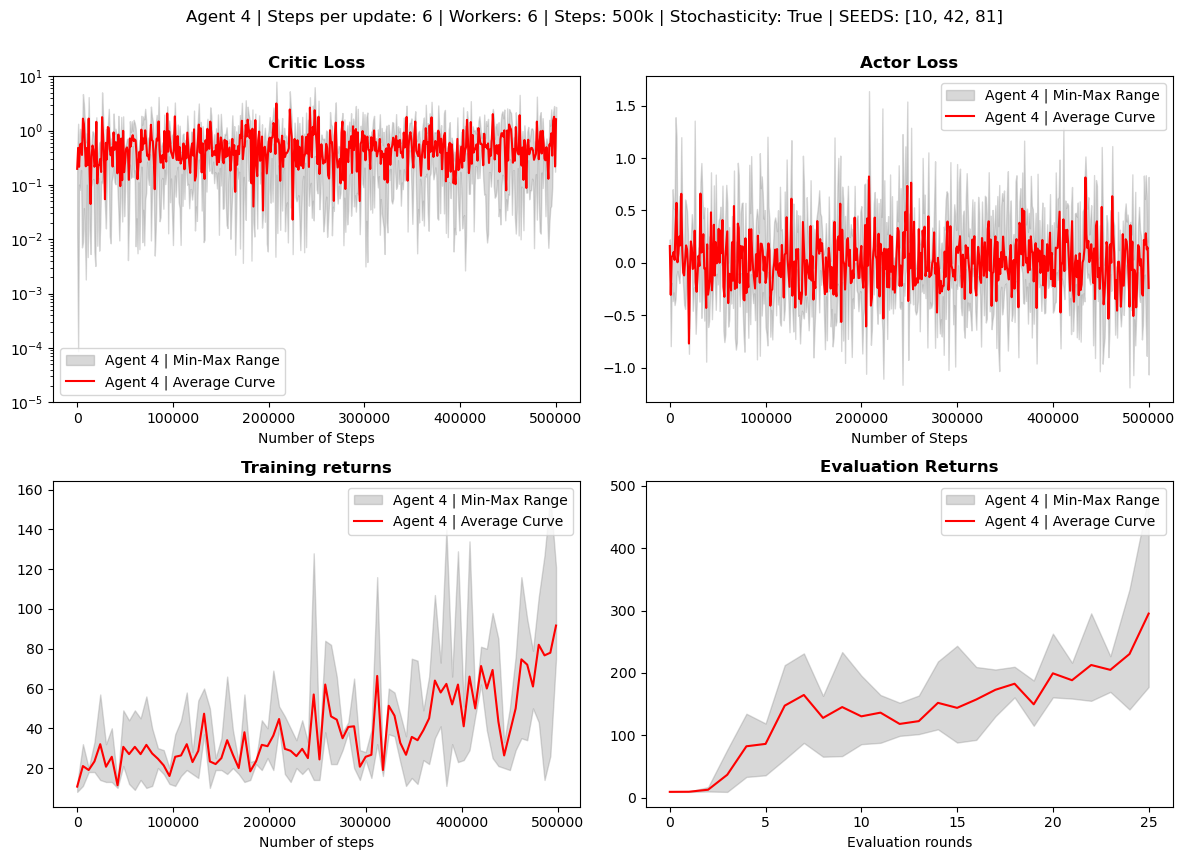

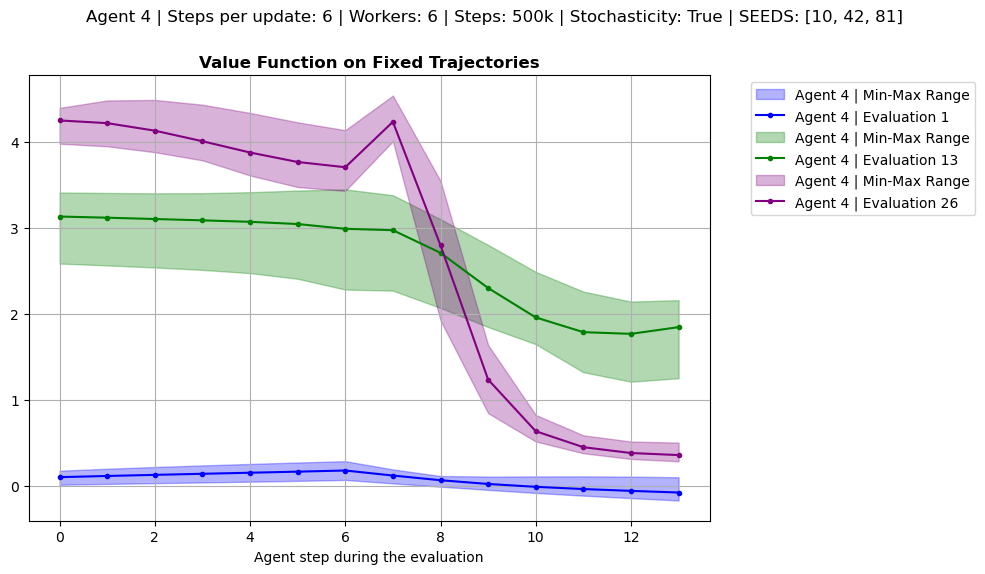

In [70]:
# Define the directory path
id_agent = "4"
directory = f'figures/Agent_{id_agent}'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Plot the losses and returns
fig_in, axs_in = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
compare_bool = False
y_lim_losses = [1e-5, 1e1]
plot_losses_and_returns(fig_in, axs_in, compare_bool, critic_losses_4, actor_losses_4, train_returns_idx_4, training_returns_4, evaluation_returns_seeds_4, agents_seeds, id_agent, n_steps_per_update_4, n_envs_4, color_agent = 'red', y_lim = y_lim_losses)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_4} | Workers: {n_envs_4} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Losses&Returns.png'), bbox_inches='tight')
plt.show()

# Plot the value function trajectories
marker_styles = [".", "1", '^', 'x', '+']
plt.figure(figsize=(10, 6))
plot_trajectories(plt, values_4, agents_seeds, id_agent, marker_styles[0], n_traj = 3)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_4} | Workers: {n_envs_4} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Trajectories.png'), bbox_inches='tight')
plt.show()

# Comparisons


In [72]:
# Selecting the agents to compare
agent_a = 'agent_3'
agent_b = 'agent_4'
#agent_c = 'agent_1b'

# Load the agents data through the correct dictionnary (either agents_data or loaded_agents_data)
dictionnary = load_agents_data("agents_data_discrete.npz")

agent_data_a = dictionnary[agent_a]; critic_a, actor_a, entrop_a, eval_return_a, values_a, agents_seeds_a, n_steps_a, stochasticity_bool_a, n_envs_a, n_steps_per_update_a, id_a, train_return_idx_a, train_returns_a = agent_data_a['critic_losses'], agent_data_a['actor_losses'], agent_data_a['entropies'], agent_data_a['evaluation_returns_seeds'], agent_data_a['values'], agent_data_a['agents_seeds'], agent_data_a['n_steps'], agent_data_a['stochasticity_bool'], agent_data_a['n_envs'], agent_data_a['n_steps_per_update'], agent_data_a['id'], agent_data_a['train_returns_idx'], agent_data_a['train_returns']
agent_data_b = dictionnary[agent_b]; critic_b, actor_b, entrop_b, eval_return_b, values_b, agents_seeds_b, n_steps_b, stochasticity_bool_b, n_envs_b, n_steps_per_update_b, id_b, train_return_idx_b, train_returns_b = agent_data_b['critic_losses'], agent_data_b['actor_losses'], agent_data_b['entropies'], agent_data_b['evaluation_returns_seeds'], agent_data_b['values'], agent_data_b['agents_seeds'], agent_data_b['n_steps'], agent_data_b['stochasticity_bool'], agent_data_b['n_envs'], agent_data_b['n_steps_per_update'], agent_data_b['id'], agent_data_b['train_returns_idx'], agent_data_b['train_returns']
#agent_data_c = dictionnary[agent_c]; critic_c, actor_c, entrop_c, eval_return_c, values_c, agents_seeds_c, n_steps_c, stochasticity_bool_c, n_envs_c, n_steps_per_update_c, id_c = agent_data_c['critic_losses'], agent_data_c['actor_losses'], agent_data_c['entropies'], agent_data_c['evaluation_returns_seeds'], agent_data_c['values'], agent_data_c['agents_seeds'], agent_data_c['n_steps'], agent_data_c['stochasticity_bool'], agent_data_c['n_envs'], agent_data_c['n_steps_per_update'], agent_data_c['id']

## Losses, Entropy and Return comparison

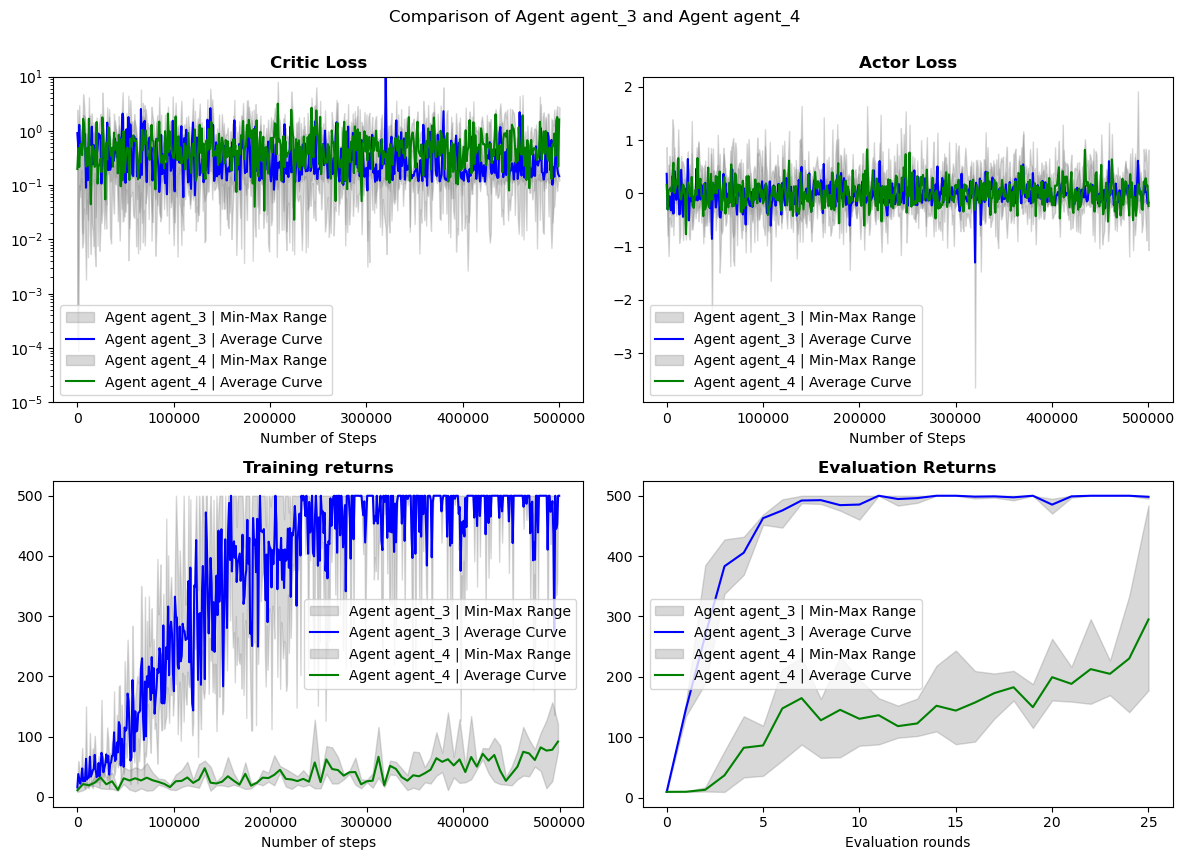

In [73]:
# Define the directory path
directory = f'figures/Comparisons'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)
    
fig_in, axs_in = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))

colors = ['blue', 'green', 'purple', 'orange', 'black', 'yellow', 'pink', 'brown', 'cyan', 'magenta']
compare_bool = True
y_lim_losses = [1e-5, 1e1]

plot_losses_and_returns(fig_in, axs_in, compare_bool, critic_a, actor_a, train_return_idx_a, train_returns_a, eval_return_a, agents_seeds, id_a, n_steps_per_update_a, n_envs_a, colors[0], y_lim = y_lim_losses)
plot_losses_and_returns(fig_in, axs_in, compare_bool, critic_b, actor_b, train_return_idx_b, train_returns_b, eval_return_b, agents_seeds, id_b, n_steps_per_update_b, n_envs_b, colors[1], y_lim = y_lim_losses)
#plot_losses_and_returns(fig_in, axs_in, compare_bool, critic_c, actor_c, entrop_c, eval_return_c, agents_seeds, id_agent, n_steps_per_update_c, n_envs_c, colors[2], ylim = y_lim_losses)

plt.suptitle(f"Comparison of Agent {id_a} and Agent {id_b}", x=0.5, fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, f'Losses&Returns_Agents_{id_a}_vs_{id_b}.png'), bbox_inches='tight')
plt.show()

## Trajectories comparison

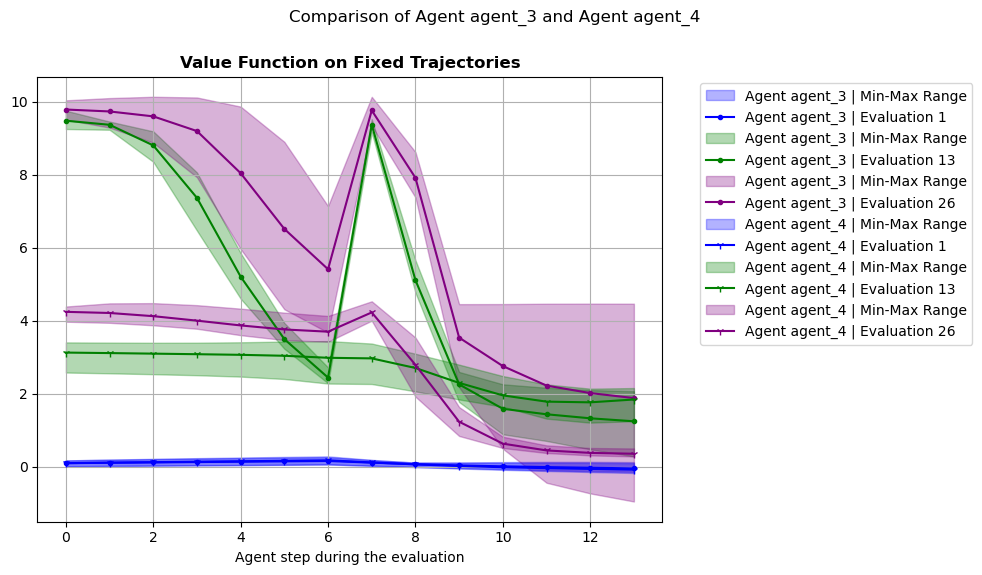

In [74]:
plt.figure(figsize=(10, 6))
marker_styles = [".", "1", '^', 'x', '+']
n_traj = 3 

# Stacking plots
plot_trajectories(plt, values_a,agents_seeds_a, id_a, marker_styles[0], n_traj)
plot_trajectories(plt, values_b,agents_seeds_b, id_b, marker_styles[1], n_traj)
#plot_trajectories(plot, values_c,agents_seeds_c, id_c, marker_styles[2], n_traj)

# Plotting esthetics
plt.suptitle(f"Comparison of Agent {id_a} and Agent {id_b}", x=0.5, fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, f'Trajectories_Agents_{id_a}_vs_{id_b}.png'), bbox_inches='tight')
plt.show()

## CONTINUOUS CASE 5-6

In [23]:
# use CartPole for the discrete case
environment = "InvertedPendulum-v4"
env_eval = gym.make(environment)
obs_shape = env_eval.observation_space.shape[0]
action_space_dims = 1 ## Continuous case ==> 1 dimension of action space: continuous force between [-3, 3] Newton
bool_discrete = False
agents_data_continuous = {}  # Creating the dictionary to store the data of the agents 5->6

### AGENT 5 (K = 1 | n = 1)

#### HYPERPARAMETERS SETUP

In [24]:
id_agent = "5" # ID of the Agent for the report [1:6]
n_envs_5 = 1
envs = []
for i in range(n_envs_5):
    env = gym.make(environment)
    envs.append(env)

n_steps_per_update_5 = 1
n_updates = n_steps // (n_steps_per_update_5*n_envs_5)
evaluation_interval = 20000//(n_steps_per_update_5*n_envs_5) # evaluate the agent every 20k steps
n_evaluations = n_updates // evaluation_interval
logging_interval = math.floor(1000/(n_steps_per_update_5 * n_envs_5))
stochasticity_bool = True

#### TRAIN AGENT

In [25]:
# Logging training variables
t0 = time.time()
values_5, critic_losses_5, actor_losses_5, entropies_5, evaluation_returns_seeds_5, training_returns_5, training_returns_idx = trainAgent(n_steps, agents_seeds,n_seeds,envs,env_eval,n_updates,bool_discrete,obs_shape,action_space_dims,device,critic_lr, actor_lr, n_envs_5, n_steps_per_update_5, evaluation_interval, logging_interval, n_eval_runs,stochasticity_bool,stochastic_reward_probability,gamma)
training_time_5 = time.time() - t0
train_returns_idx_5 = aggregate_return_seeds(training_returns_idx) # Aggregate the returns of the training over the 3 seeds

agents_data_continuous.update(create_agent_data('agent_5', values_5, critic_losses_5, actor_losses_5, entropies_5, evaluation_returns_seeds_5, agents_seeds, n_steps, stochasticity_bool, n_envs_5, n_steps_per_update_5, train_returns_idx_5, training_returns_5, training_time_5))
save_agents_data(agents_data_continuous, 'agents_data_continuous.npz') # Saving the data of the agents

Running seed 10 for agent 0


  0%|          | 116/500001 [00:00<07:12, 1156.23it/s]

EVALUATION


  4%|▍         | 20161/500001 [00:15<06:37, 1207.57it/s]

EVALUATION


  8%|▊         | 39994/500001 [00:29<05:35, 1369.42it/s]

EVALUATION


 12%|█▏        | 59907/500001 [00:44<05:22, 1365.56it/s]

EVALUATION


 16%|█▌        | 79988/500001 [01:00<07:11, 973.81it/s] 

EVALUATION


 20%|█▉        | 99932/500001 [01:19<06:07, 1089.25it/s]

EVALUATION


 24%|██▍       | 119973/500001 [01:37<05:18, 1193.79it/s]

EVALUATION


 28%|██▊       | 139897/500001 [01:55<05:14, 1145.89it/s]

EVALUATION


 32%|███▏      | 159976/500001 [02:13<04:54, 1156.01it/s]

EVALUATION


 36%|███▌      | 179922/500001 [02:31<04:33, 1169.30it/s]

EVALUATION


 40%|███▉      | 199907/500001 [02:49<04:09, 1202.80it/s]

EVALUATION


 44%|████▍     | 219923/500001 [03:07<03:53, 1201.42it/s]

EVALUATION


 48%|████▊     | 239894/500001 [03:25<03:42, 1170.58it/s]

EVALUATION


 52%|█████▏    | 259959/500001 [03:43<03:53, 1027.67it/s]

EVALUATION


 56%|█████▌    | 279999/500001 [04:01<03:06, 1179.51it/s]

EVALUATION


 60%|█████▉    | 299941/500001 [04:19<02:54, 1145.13it/s]

EVALUATION


 64%|██████▍   | 319907/500001 [04:36<02:29, 1202.90it/s]

EVALUATION


 68%|██████▊   | 339895/500001 [04:54<02:13, 1199.19it/s]

EVALUATION


 72%|███████▏  | 359943/500001 [05:12<01:57, 1193.66it/s]

EVALUATION


 76%|███████▌  | 379971/500001 [05:30<01:39, 1203.16it/s]

EVALUATION


 80%|███████▉  | 399934/500001 [05:47<01:22, 1206.51it/s]

EVALUATION


 84%|████████▍ | 419900/500001 [06:05<01:05, 1229.36it/s]

EVALUATION


 88%|████████▊ | 439970/500001 [06:23<00:49, 1206.96it/s]

EVALUATION


 92%|█████████▏| 459972/500001 [06:41<00:32, 1217.90it/s]

EVALUATION


 96%|█████████▌| 479903/500001 [06:58<00:16, 1212.12it/s]

EVALUATION


100%|█████████▉| 499947/500001 [07:16<00:00, 1200.14it/s]

EVALUATION


100%|██████████| 500001/500001 [07:17<00:00, 1143.48it/s]


Running seed 42 for agent 1


  0%|          | 104/500001 [00:00<08:01, 1037.62it/s]

EVALUATION


  4%|▍         | 20038/500001 [00:16<08:00, 999.68it/s] 

EVALUATION


  8%|▊         | 39934/500001 [00:33<06:24, 1196.65it/s]

EVALUATION


 12%|█▏        | 59948/500001 [00:50<06:02, 1212.75it/s]

EVALUATION


 16%|█▌        | 79953/500001 [01:07<05:45, 1216.61it/s]

EVALUATION


 20%|█▉        | 99949/500001 [01:24<05:48, 1148.04it/s]

EVALUATION


 24%|██▍       | 119905/500001 [01:41<05:08, 1231.22it/s]

EVALUATION


 28%|██▊       | 139982/500001 [01:58<04:56, 1213.33it/s]

EVALUATION


 32%|███▏      | 159898/500001 [02:16<04:38, 1220.28it/s]

EVALUATION


 36%|███▌      | 179966/500001 [02:33<04:19, 1235.07it/s]

EVALUATION


 40%|███▉      | 199974/500001 [02:51<04:07, 1211.34it/s]

EVALUATION


 44%|████▍     | 219997/500001 [03:09<03:47, 1231.87it/s]

EVALUATION


 48%|████▊     | 239914/500001 [03:26<03:35, 1207.41it/s]

EVALUATION


 52%|█████▏    | 259931/500001 [03:44<03:15, 1226.11it/s]

EVALUATION


 56%|█████▌    | 279947/500001 [04:01<03:02, 1209.07it/s]

EVALUATION


 60%|█████▉    | 299882/500001 [04:19<02:47, 1197.39it/s]

EVALUATION


 64%|██████▍   | 319999/500001 [04:37<02:27, 1219.02it/s]

EVALUATION


 68%|██████▊   | 339933/500001 [04:54<02:15, 1177.72it/s]

EVALUATION


 72%|███████▏  | 359948/500001 [05:12<01:58, 1185.32it/s]

EVALUATION


 76%|███████▌  | 379923/500001 [05:29<01:46, 1125.96it/s]

EVALUATION


 80%|███████▉  | 399960/500001 [05:47<01:21, 1226.67it/s]

EVALUATION


 84%|████████▍ | 419903/500001 [06:04<01:06, 1203.41it/s]

EVALUATION


 88%|████████▊ | 439977/500001 [06:22<00:49, 1203.28it/s]

EVALUATION


 92%|█████████▏| 459891/500001 [06:40<00:40, 996.39it/s] 

EVALUATION


 96%|█████████▌| 479982/500001 [06:57<00:16, 1206.67it/s]

EVALUATION


100%|█████████▉| 499960/500001 [07:14<00:00, 1354.87it/s]

EVALUATION


100%|██████████| 500001/500001 [07:15<00:00, 1148.21it/s]


Running seed 81 for agent 2


  0%|          | 117/500001 [00:00<07:08, 1166.90it/s]

EVALUATION


  4%|▍         | 20092/500001 [00:15<06:40, 1198.12it/s]

EVALUATION


  8%|▊         | 39931/500001 [00:30<06:10, 1243.33it/s]

EVALUATION


 12%|█▏        | 59986/500001 [00:46<05:42, 1285.61it/s]

EVALUATION


 16%|█▌        | 79908/500001 [01:03<05:30, 1270.77it/s]

EVALUATION


 20%|█▉        | 99939/500001 [01:20<05:50, 1141.13it/s]

EVALUATION


 24%|██▍       | 119976/500001 [01:37<05:03, 1253.57it/s]

EVALUATION


 28%|██▊       | 139913/500001 [01:54<05:45, 1041.83it/s]

EVALUATION


 32%|███▏      | 159967/500001 [02:11<04:28, 1266.17it/s]

EVALUATION


 36%|███▌      | 179963/500001 [02:28<04:47, 1114.09it/s]

EVALUATION


 40%|███▉      | 199942/500001 [02:45<04:11, 1193.93it/s]

EVALUATION


 44%|████▍     | 219999/500001 [03:02<04:09, 1121.99it/s]

EVALUATION


 48%|████▊     | 239948/500001 [03:19<03:29, 1244.25it/s]

EVALUATION


 52%|█████▏    | 259917/500001 [03:35<03:05, 1296.76it/s]

EVALUATION


 56%|█████▌    | 279951/500001 [03:52<02:46, 1320.85it/s]

EVALUATION


 60%|█████▉    | 299933/500001 [04:08<02:44, 1214.97it/s]

EVALUATION


 64%|██████▍   | 319997/500001 [04:25<02:18, 1301.69it/s]

EVALUATION


 68%|██████▊   | 339896/500001 [04:42<02:01, 1318.20it/s]

EVALUATION


 72%|███████▏  | 359933/500001 [04:58<02:09, 1079.30it/s]

EVALUATION


 76%|███████▌  | 379891/500001 [05:15<01:30, 1320.33it/s]

EVALUATION


 80%|███████▉  | 399877/500001 [05:31<01:10, 1420.67it/s]

EVALUATION


 84%|████████▍ | 419981/500001 [05:47<00:59, 1337.56it/s]

EVALUATION


 88%|████████▊ | 440000/500001 [06:04<01:03, 948.05it/s] 

EVALUATION


 92%|█████████▏| 459884/500001 [06:21<00:29, 1338.63it/s]

EVALUATION


 96%|█████████▌| 479892/500001 [06:37<00:15, 1306.53it/s]

EVALUATION


100%|█████████▉| 499899/500001 [06:53<00:00, 1347.59it/s]

EVALUATION


100%|██████████| 500001/500001 [06:54<00:00, 1205.42it/s]


#### PLOTTING

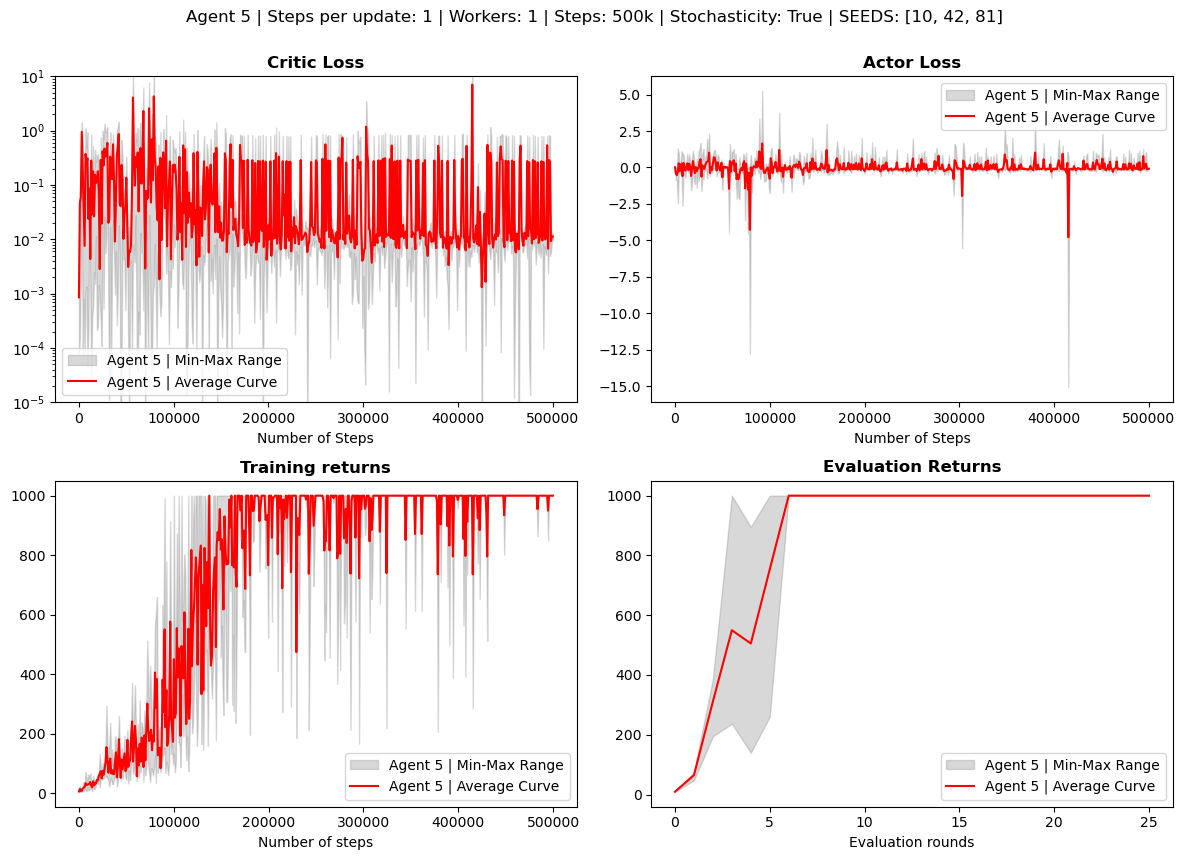

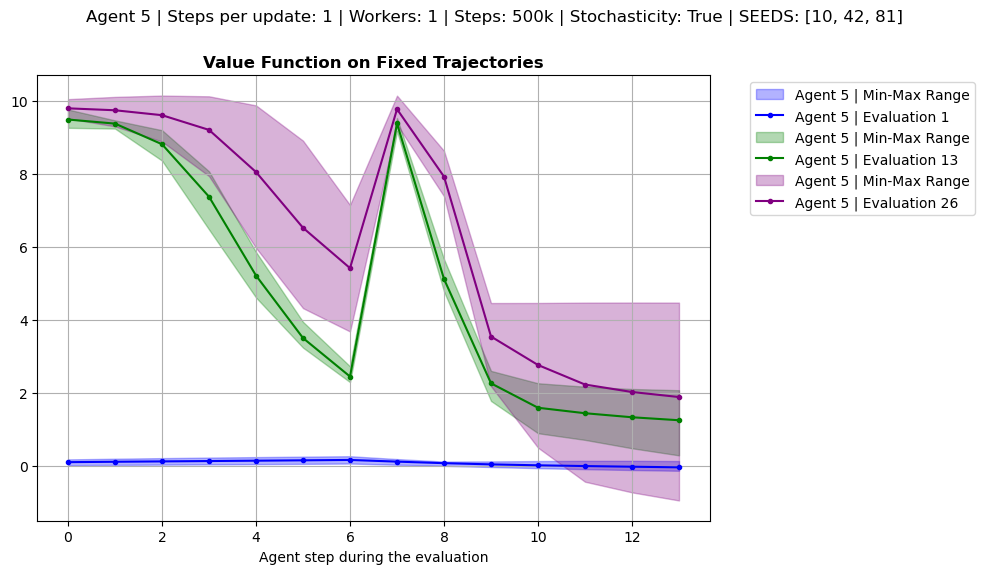

In [75]:
# Define the directory path
id_agent = "5"
directory = f'figures/Agent_{id_agent}'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Plot the losses and returns
fig_in, axs_in = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
compare_bool = False
y_lim_losses = [1e-5, 1e1]
plot_losses_and_returns(fig_in, axs_in, compare_bool, critic_losses_5, actor_losses_5, train_returns_idx_5, training_returns_5, evaluation_returns_seeds_5, agents_seeds, id_agent, n_steps_per_update_5, n_envs_5, color_agent = 'red', y_lim = y_lim_losses)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_5} | Workers: {n_envs_5} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Losses&Returns.png'), bbox_inches='tight')
plt.show()

# Plot the value function trajectories
marker_styles = [".", "1", '^', 'x', '+']
plt.figure(figsize=(10, 6))
plot_trajectories(plt, values_3, agents_seeds, id_agent, marker_styles[0], n_traj = 3)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_5} | Workers: {n_envs_5} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Trajectories.png'), bbox_inches='tight')
plt.show()

### AGENT 6 (K = 6 | n = 6)

#### HYPERPARAMETERS SETUP

In [27]:
id_agent = "6" # ID of the Agent for the report [1:6]
n_envs_6 = 6
envs = []
for i in range(n_envs_6):
    env = gym.make(environment)
    envs.append(env)

n_steps_per_update_6 = 6
n_updates = n_steps // (n_steps_per_update_6*n_envs_6)
evaluation_interval = 20000//(n_steps_per_update_6*n_envs_6) # evaluate the agent every 20k steps
n_evaluations = n_updates // evaluation_interval
stochasticity_bool = True
logging_interval = math.floor(1000/(n_steps_per_update_6 * n_envs_6))
actor_lr = 3e-4
#agents_data_continuous = load_agents_data("agents_data_continuous.npz") # Load the data of the previous agents

#### TRAIN AGENT

In [28]:
# Logging training variables
t0 = time.time()
values_6, critic_losses_6, actor_losses_6, entropies_6, evaluation_returns_seeds_6, training_returns_6, training_returns_idx = trainAgent(n_steps, agents_seeds,n_seeds,envs,env_eval,n_updates,bool_discrete,obs_shape,action_space_dims,device,critic_lr, actor_lr, n_envs_6, n_steps_per_update_6, evaluation_interval, logging_interval, n_eval_runs,stochasticity_bool,stochastic_reward_probability,gamma)
training_time_6 = time.time() - t0

train_returns_idx_6 = aggregate_return_seeds(training_returns_idx) # Aggregate the returns of the training over the 3 seeds
agents_data_continuous.update(create_agent_data('agent_6', values_6, critic_losses_6, actor_losses_6, entropies_6, evaluation_returns_seeds_6, agents_seeds, n_steps, stochasticity_bool, n_envs_6, n_steps_per_update_6, train_returns_idx_6, training_returns_6, training_time_6))
save_agents_data(agents_data_continuous, 'agents_data_continuous.npz') # Saving the data of the agents

Running seed 10 for agent 0


  0%|          | 8/13889 [00:00<03:07, 73.91it/s]

EVALUATION


  4%|▍         | 565/13889 [00:06<02:33, 86.94it/s]

EVALUATION


  8%|▊         | 1123/13889 [00:12<02:28, 86.25it/s]

EVALUATION


 12%|█▏        | 1664/13889 [00:18<02:20, 86.89it/s]

EVALUATION


 16%|█▌        | 2226/13889 [00:25<02:33, 75.88it/s]

EVALUATION


 20%|██        | 2782/13889 [00:31<02:35, 71.60it/s]

EVALUATION


 24%|██▍       | 3341/13889 [00:37<02:06, 83.12it/s]

EVALUATION


 28%|██▊       | 3891/13889 [00:43<02:16, 73.08it/s]

EVALUATION


 32%|███▏      | 4440/13889 [00:49<01:54, 82.87it/s]

EVALUATION


 36%|███▌      | 4988/13889 [00:56<01:38, 90.79it/s]

EVALUATION


 40%|███▉      | 5554/13889 [01:02<02:12, 62.84it/s]

EVALUATION


 44%|████▍     | 6111/13889 [01:08<01:36, 80.80it/s]

EVALUATION


 48%|████▊     | 6658/13889 [01:14<01:19, 91.16it/s]

EVALUATION


 52%|█████▏    | 7216/13889 [01:21<01:36, 69.20it/s]

EVALUATION


 56%|█████▌    | 7763/13889 [01:27<01:07, 91.25it/s]

EVALUATION


 60%|█████▉    | 8323/13889 [01:34<01:01, 91.12it/s]

EVALUATION


 64%|██████▍   | 8880/13889 [01:41<00:58, 85.96it/s]

EVALUATION


 68%|██████▊   | 9433/13889 [01:49<00:55, 80.73it/s]

EVALUATION


 72%|███████▏  | 9987/13889 [01:56<00:42, 92.01it/s]

EVALUATION


 76%|███████▌  | 10537/13889 [02:03<00:41, 81.25it/s]

EVALUATION


 80%|███████▉  | 11100/13889 [02:10<00:29, 93.94it/s]

EVALUATION


 84%|████████▍ | 11654/13889 [02:17<00:28, 79.78it/s]

EVALUATION


 88%|████████▊ | 12201/13889 [02:24<00:18, 91.84it/s]

EVALUATION


 92%|█████████▏| 12759/13889 [02:31<00:12, 91.94it/s]

EVALUATION


 96%|█████████▌| 13313/13889 [02:38<00:06, 91.73it/s]

EVALUATION


100%|█████████▉| 13875/13889 [02:45<00:00, 92.16it/s]

EVALUATION


100%|██████████| 13889/13889 [02:46<00:00, 83.60it/s]


Running seed 42 for agent 1


  0%|          | 7/13889 [00:00<03:26, 67.09it/s]

EVALUATION


  4%|▍         | 563/13889 [00:06<02:37, 84.78it/s]

EVALUATION


  8%|▊         | 1125/13889 [00:12<02:23, 88.92it/s]

EVALUATION


 12%|█▏        | 1670/13889 [00:18<02:32, 80.08it/s]

EVALUATION


 16%|█▌        | 2220/13889 [00:24<02:04, 93.68it/s]

EVALUATION


 20%|██        | 2788/13889 [00:31<02:17, 80.58it/s]

EVALUATION


 24%|██▍       | 3334/13889 [00:37<02:20, 75.39it/s]

EVALUATION


 28%|██▊       | 3890/13889 [00:43<02:18, 72.42it/s]

EVALUATION


 32%|███▏      | 4439/13889 [00:49<01:41, 93.53it/s]

EVALUATION


 36%|███▌      | 5004/13889 [00:56<02:01, 72.99it/s]

EVALUATION


 40%|███▉      | 5545/13889 [01:02<01:48, 76.57it/s]

EVALUATION


 44%|████▍     | 6098/13889 [01:08<01:24, 91.74it/s]

EVALUATION


 48%|████▊     | 6654/13889 [01:15<01:15, 95.86it/s]

EVALUATION


 52%|█████▏    | 7213/13889 [01:22<01:32, 72.47it/s]

EVALUATION


 56%|█████▌    | 7765/13889 [01:29<01:07, 90.93it/s]

EVALUATION


 60%|█████▉    | 8324/13889 [01:36<00:57, 95.95it/s]

EVALUATION


 64%|██████▍   | 8877/13889 [01:42<00:53, 93.09it/s]

EVALUATION


 68%|██████▊   | 9426/13889 [01:49<00:47, 94.79it/s]

EVALUATION


 72%|███████▏  | 9989/13889 [01:56<00:45, 85.59it/s]

EVALUATION


 76%|███████▌  | 10542/13889 [02:03<00:35, 93.36it/s]

EVALUATION


 80%|███████▉  | 11093/13889 [02:10<00:32, 86.15it/s]

EVALUATION


 84%|████████▍ | 11647/13889 [02:17<00:25, 88.55it/s]

EVALUATION


 88%|████████▊ | 12202/13889 [02:24<00:17, 95.93it/s]

EVALUATION


 92%|█████████▏| 12759/13889 [02:31<00:13, 86.83it/s]

EVALUATION


 96%|█████████▌| 13314/13889 [02:38<00:06, 86.21it/s]

EVALUATION


100%|█████████▉| 13871/13889 [02:45<00:00, 92.85it/s]

EVALUATION


100%|██████████| 13889/13889 [02:46<00:00, 83.26it/s]


Running seed 81 for agent 2


  0%|          | 8/13889 [00:00<02:58, 77.95it/s]

EVALUATION


  4%|▍         | 565/13889 [00:06<02:51, 77.85it/s]

EVALUATION


  8%|▊         | 1122/13889 [00:12<02:28, 86.13it/s]

EVALUATION


 12%|█▏        | 1673/13889 [00:19<02:40, 76.18it/s]

EVALUATION


 16%|█▌        | 2226/13889 [00:25<02:37, 74.08it/s]

EVALUATION


 20%|██        | 2784/13889 [00:32<02:29, 74.06it/s]

EVALUATION


 24%|██▍       | 3341/13889 [00:38<02:07, 82.56it/s]

EVALUATION


 28%|██▊       | 3879/13889 [00:44<01:47, 92.73it/s]

EVALUATION


 32%|███▏      | 4447/13889 [00:51<01:59, 79.31it/s]

EVALUATION


 36%|███▌      | 4992/13889 [00:57<01:36, 92.32it/s]

EVALUATION


 40%|███▉      | 5548/13889 [01:03<01:32, 90.35it/s]

EVALUATION


 44%|████▍     | 6110/13889 [01:10<01:44, 74.37it/s]

EVALUATION


 48%|████▊     | 6653/13889 [01:16<01:18, 92.22it/s]

EVALUATION


 52%|█████▏    | 7213/13889 [01:22<01:12, 92.47it/s]

EVALUATION


 56%|█████▌    | 7763/13889 [01:29<01:03, 96.59it/s]

EVALUATION


 60%|█████▉    | 8323/13889 [01:36<01:00, 91.65it/s]

EVALUATION


 64%|██████▍   | 8879/13889 [01:43<00:52, 95.79it/s]

EVALUATION


 68%|██████▊   | 9433/13889 [01:50<00:47, 92.86it/s]

EVALUATION


 72%|███████▏  | 9988/13889 [01:57<00:41, 93.65it/s]

EVALUATION


 76%|███████▌  | 10558/13889 [02:04<00:40, 82.64it/s]

EVALUATION


 80%|███████▉  | 11091/13889 [02:10<00:30, 92.22it/s]

EVALUATION


 84%|████████▍ | 11647/13889 [02:17<00:23, 93.45it/s]

EVALUATION


 88%|████████▊ | 12205/13889 [02:24<00:18, 93.19it/s]

EVALUATION


 92%|█████████▏| 12763/13889 [02:31<00:13, 85.19it/s]

EVALUATION


 96%|█████████▌| 13318/13889 [02:38<00:06, 83.49it/s]

EVALUATION


100%|█████████▉| 13868/13889 [02:46<00:00, 84.70it/s]

EVALUATION


100%|██████████| 13889/13889 [02:47<00:00, 82.69it/s]


#### PLOTTING

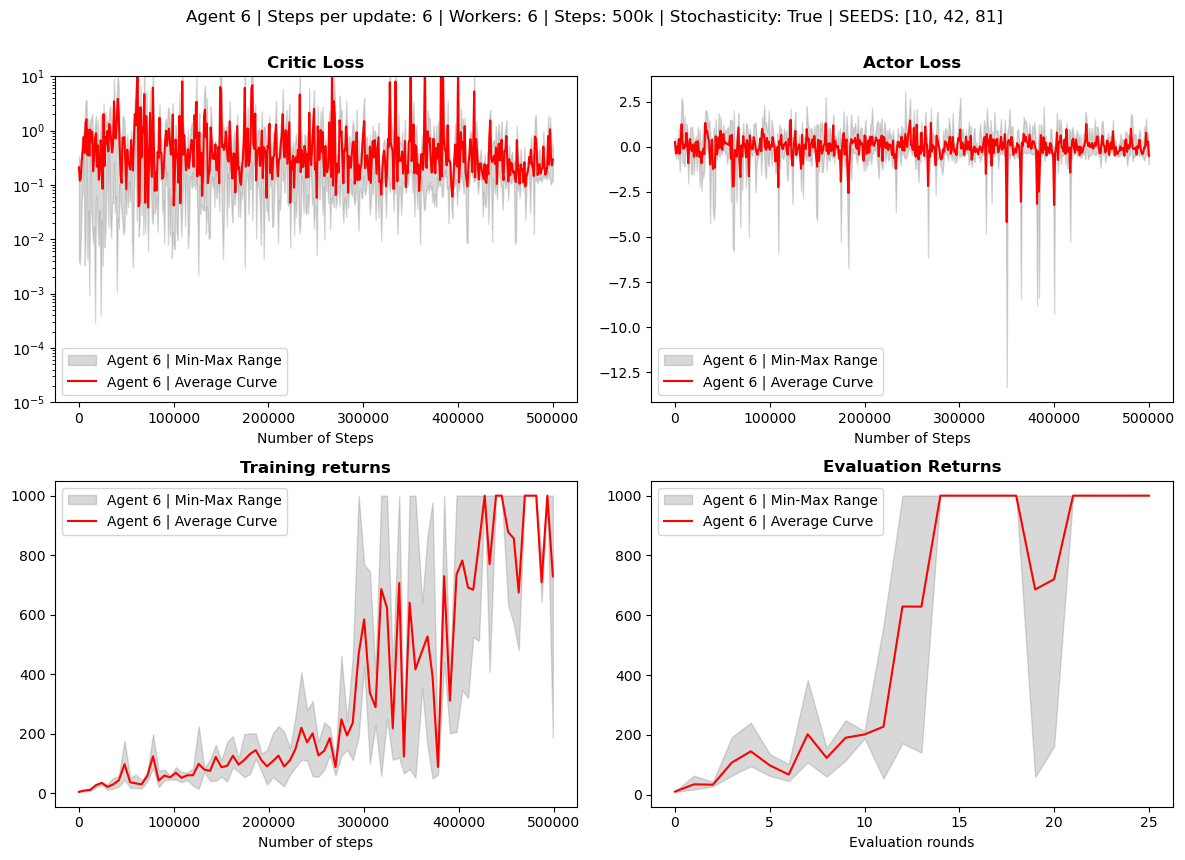

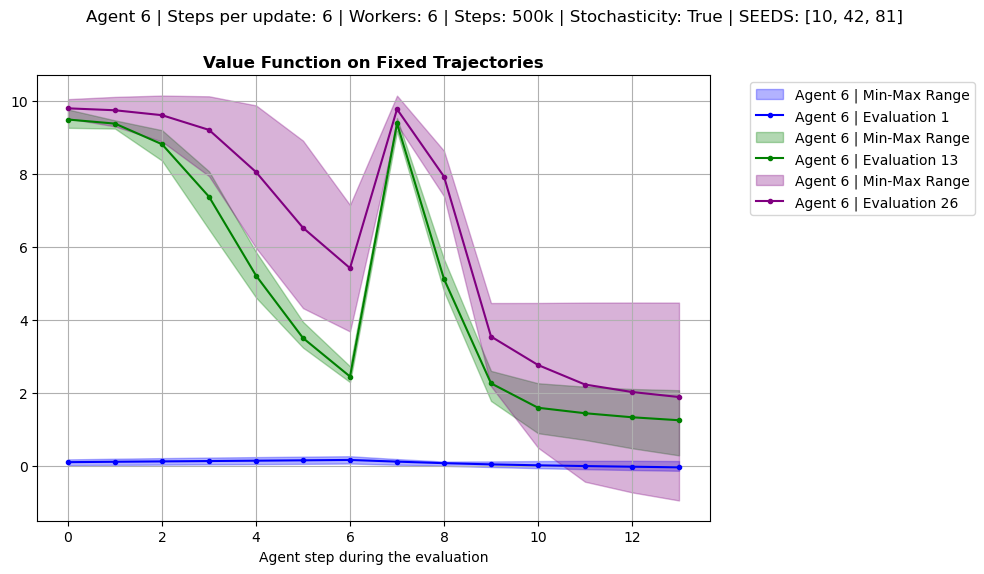

In [76]:
# Define the directory path
id_agent = "6"
directory = f'figures/Agent_{id_agent}'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Plot the losses and returns
fig_in, axs_in = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
compare_bool = False
y_lim_losses = [1e-5, 1e1]
plot_losses_and_returns(fig_in, axs_in, compare_bool, critic_losses_6, actor_losses_6, train_returns_idx_6, training_returns_6, evaluation_returns_seeds_6, agents_seeds, id_agent, n_steps_per_update_6, n_envs_6, color_agent = 'red', y_lim = y_lim_losses)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_6} | Workers: {n_envs_6} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Losses&Returns.png'), bbox_inches='tight')
plt.show()

# Plot the value function trajectories
marker_styles = [".", "1", '^', 'x', '+']
plt.figure(figsize=(10, 6))
plot_trajectories(plt, values_3, agents_seeds, id_agent, marker_styles[0], n_traj = 3)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_6} | Workers: {n_envs_6} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Trajectories.png'), bbox_inches='tight')
plt.show()

# Comparisons


In [77]:
# Selecting the agents to compare
agent_a = 'agent_5'
agent_b = 'agent_6'
#agent_c = 'agent_1b'

# Load the agents data through the correct dictionnary (either agents_data or loaded_agents_data)
dictionnary = load_agents_data("agents_data_continuous.npz")
agent_data_a = dictionnary[agent_a]; critic_a, actor_a, entrop_a, eval_return_a, values_a, agents_seeds_a, n_steps_a, stochasticity_bool_a, n_envs_a, n_steps_per_update_a, id_a, train_return_idx_a, train_returns_a = agent_data_a['critic_losses'], agent_data_a['actor_losses'], agent_data_a['entropies'], agent_data_a['evaluation_returns_seeds'], agent_data_a['values'], agent_data_a['agents_seeds'], agent_data_a['n_steps'], agent_data_a['stochasticity_bool'], agent_data_a['n_envs'], agent_data_a['n_steps_per_update'], agent_data_a['id'], agent_data_a['train_returns_idx'], agent_data_a['train_returns']
agent_data_b = dictionnary[agent_b]; critic_b, actor_b, entrop_b, eval_return_b, values_b, agents_seeds_b, n_steps_b, stochasticity_bool_b, n_envs_b, n_steps_per_update_b, id_b, train_return_idx_b, train_returns_b = agent_data_b['critic_losses'], agent_data_b['actor_losses'], agent_data_b['entropies'], agent_data_b['evaluation_returns_seeds'], agent_data_b['values'], agent_data_b['agents_seeds'], agent_data_b['n_steps'], agent_data_b['stochasticity_bool'], agent_data_b['n_envs'], agent_data_b['n_steps_per_update'], agent_data_b['id'], agent_data_b['train_returns_idx'], agent_data_b['train_returns']
#agent_data_c = dictionnary[agent_c]; critic_c, actor_c, entrop_c, eval_return_c, values_c, agents_seeds_c, n_steps_c, stochasticity_bool_c, n_envs_c, n_steps_per_update_c, id_c = agent_data_c['critic_losses'], agent_data_c['actor_losses'], agent_data_c['entropies'], agent_data_c['evaluation_returns_seeds'], agent_data_c['values'], agent_data_c['agents_seeds'], agent_data_c['n_steps'], agent_data_c['stochasticity_bool'], agent_data_c['n_envs'], agent_data_c['n_steps_per_update'], agent_data_c['id']

## Losses, Entropy and Return comparison

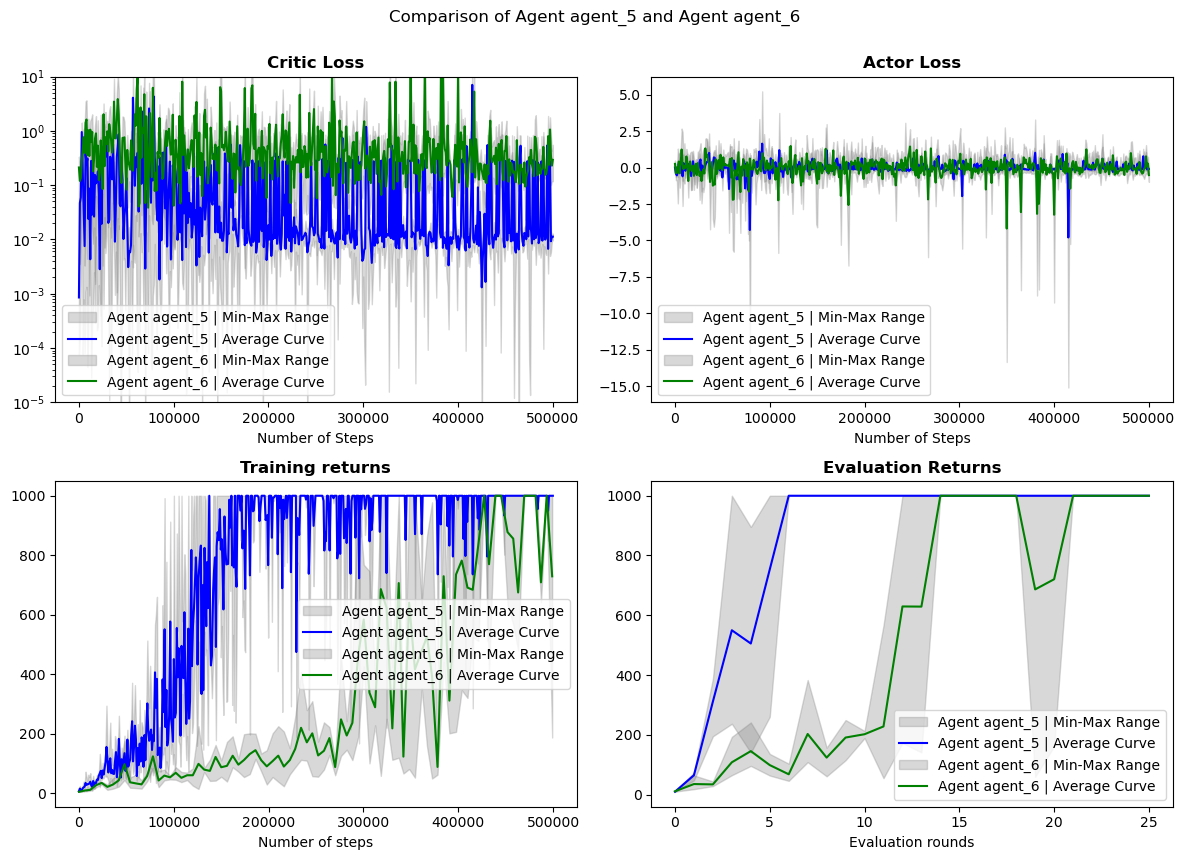

In [78]:

# Define the directory path
directory = f'figures/Comparisons'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

fig_in, axs_in = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))

colors = ['blue', 'green', 'purple', 'orange', 'black', 'yellow', 'pink', 'brown', 'cyan', 'magenta']
compare_bool = True
y_lim_losses = [1e-5, 1e1]

plot_losses_and_returns(fig_in, axs_in, compare_bool, critic_a, actor_a, train_return_idx_a, train_returns_a, eval_return_a, agents_seeds, id_a, n_steps_per_update_a, n_envs_a, colors[0], y_lim = y_lim_losses)
plot_losses_and_returns(fig_in, axs_in, compare_bool, critic_b, actor_b, train_return_idx_b, train_returns_b, eval_return_b, agents_seeds, id_b, n_steps_per_update_b, n_envs_b, colors[1], y_lim = y_lim_losses)
#plot_losses_and_returns(fig_in, axs_in, compare_bool, critic_c, actor_c, entrop_c, eval_return_c, agents_seeds, id_agent, n_steps_per_update_c, n_envs_c, colors[2], ylim = y_lim_losses)

plt.suptitle(f"Comparison of Agent {id_a} and Agent {id_b}", x=0.5, fontsize=12)
#fig.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update} | Workers: {n_envs} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, f'Losses&Returns_Agents_{id_a}_vs_{id_b}.png'), bbox_inches='tight')
plt.show()

## Trajectories comparison

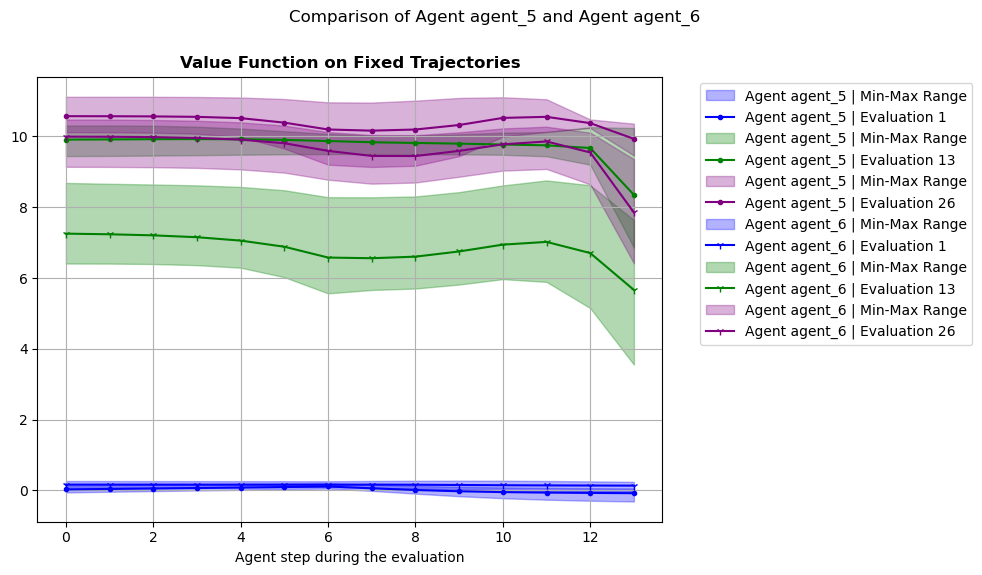

In [79]:
plt.figure(figsize=(10, 6))
marker_styles = [".", "1", '^', 'x', '+']
n_traj = 3 

# Stacking plots
plot_trajectories(plt, values_a,agents_seeds_a, id_a, marker_styles[0], n_traj)
plot_trajectories(plt, values_b,agents_seeds_b, id_b, marker_styles[1], n_traj)
#plot_trajectories(plot, values_c,agents_seeds_c, id_c, marker_styles[2], n_traj)

# Plotting esthetics
plt.suptitle(f"Comparison of Agent {id_a} and Agent {id_b}", x=0.5, fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, f'Trajectories_Agents_{id_a}_vs_{id_b}.png'), bbox_inches='tight')
plt.show()

# New plottings (Tuesday May 28th)

In [82]:
# Loading the data
# Selecting the agents to compare
agent_a = 'agent_1b'
agent_b = 'agent_2'
agent_c = 'agent_3'
agent_d = 'agent_4'

# Load the agents data through the correct dictionnary (either agents_data or loaded_agents_data)
dictionnary = load_agents_data("agents_data_discrete.npz")

agent_data_a = dictionnary[agent_a]; critic_a, actor_a, entrop_a, eval_return_a, values_a, agents_seeds_a, n_steps_a, stochasticity_bool_a, n_envs_a, n_steps_per_update_a, id_a, train_return_idx_a, train_returns_a = agent_data_a['critic_losses'], agent_data_a['actor_losses'], agent_data_a['entropies'], agent_data_a['evaluation_returns_seeds'], agent_data_a['values'], agent_data_a['agents_seeds'], agent_data_a['n_steps'], agent_data_a['stochasticity_bool'], agent_data_a['n_envs'], agent_data_a['n_steps_per_update'], agent_data_a['id'], agent_data_a['train_returns_idx'], agent_data_a['train_returns']
agent_data_b = dictionnary[agent_b]; critic_b, actor_b, entrop_b, eval_return_b, values_b, agents_seeds_b, n_steps_b, stochasticity_bool_b, n_envs_b, n_steps_per_update_b, id_b, train_return_idx_b, train_returns_b = agent_data_b['critic_losses'], agent_data_b['actor_losses'], agent_data_b['entropies'], agent_data_b['evaluation_returns_seeds'], agent_data_b['values'], agent_data_b['agents_seeds'], agent_data_b['n_steps'], agent_data_b['stochasticity_bool'], agent_data_b['n_envs'], agent_data_b['n_steps_per_update'], agent_data_b['id'], agent_data_b['train_returns_idx'], agent_data_b['train_returns']
agent_data_c = dictionnary[agent_c]; critic_c, actor_c, entrop_c, eval_return_c, values_c, agents_seeds_c, n_steps_c, stochasticity_bool_c, n_envs_c, n_steps_per_update_c, id_c, train_return_idx_c, train_returns_c = agent_data_c['critic_losses'], agent_data_c['actor_losses'], agent_data_c['entropies'], agent_data_c['evaluation_returns_seeds'], agent_data_c['values'], agent_data_c['agents_seeds'], agent_data_c['n_steps'], agent_data_c['stochasticity_bool'], agent_data_c['n_envs'], agent_data_c['n_steps_per_update'], agent_data_c['id'], agent_data_c['train_returns_idx'], agent_data_c['train_returns']
agent_data_d = dictionnary[agent_d]; critic_d, actor_d, entrop_d, eval_return_d, values_d, agents_seeds_d, n_steps_d, stochasticity_bool_d, n_envs_d, n_steps_per_update_d, id_d, train_return_idx_d, train_returns_d = agent_data_d['critic_losses'], agent_data_d['actor_losses'], agent_data_d['entropies'], agent_data_d['evaluation_returns_seeds'], agent_data_d['values'], agent_data_d['agents_seeds'], agent_data_d['n_steps'], agent_data_d['stochasticity_bool'], agent_data_d['n_envs'], agent_data_d['n_steps_per_update'], agent_data_d['id'], agent_data_d['train_returns_idx'], agent_data_d['train_returns']


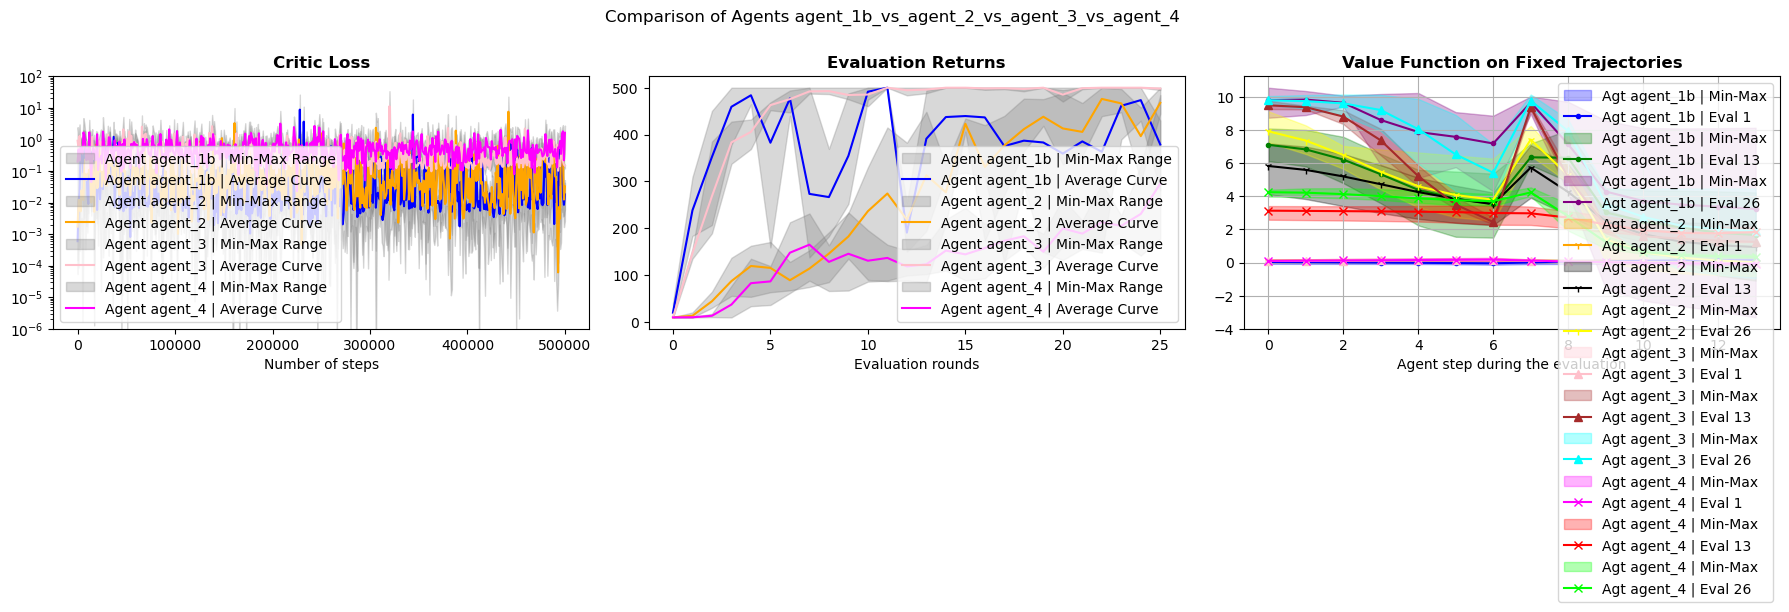

In [83]:

marker_styles = [".", "1", '^', 'x', '+']
fig_in, axs_in = plt.subplots(1, 3, figsize=(18, 5))
colors = ['blue', 'green', 'purple', 'orange', 'black', 'yellow', 'pink', 'brown', 'cyan', 'magenta', 'red', 'lime']
ylim = [1e-6, 1e2]
three_time_one_plot(fig_in, axs_in, compare_bool, critic_a, eval_return_a, values_a, agents_seeds, id_a, color_agent = colors[:3], marker_style=marker_styles[0], y_lim=ylim)
three_time_one_plot(fig_in, axs_in, compare_bool, critic_b, eval_return_b, values_b, agents_seeds, id_b, color_agent = colors[3:6], marker_style=marker_styles[1], y_lim=ylim)
three_time_one_plot(fig_in, axs_in, compare_bool, critic_c, eval_return_c, values_c, agents_seeds, id_c, color_agent = colors[6:9], marker_style=marker_styles[2], y_lim=ylim)
three_time_one_plot(fig_in, axs_in, compare_bool, critic_d, eval_return_d, values_d, agents_seeds, id_d, color_agent = colors[9:], marker_style=marker_styles[3], y_lim=ylim)

#plt.suptitle(f"Comparison of Agent {id_a} and Agent {id_b}", x=0.5, fontsize=12)
plt.suptitle(f"Comparison of Agents {id_a}_vs_{id_b}_vs_{id_c}_vs_{id_d} ", x=0.5, fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, f'ThreeInOne_Agents{id_a}_vs_{id_b}_vs_{id_c}_vs_{id_d}.png'), bbox_inches='tight')

plt.show()